# goals
* explore the mismatch between lensed, RP and NP waveforms
* explore the conditions for indistinguishable waveforms

# import modules

In [15]:
import sys

sys.path.insert(0, "../")

from modules.Classes_ver1 import *
from modules.default_params_ver1 import *
from modules.functions_ver1 import *

# assign params

default: mcz = 20 solar masses, MLz = 2000 solar masses

In [16]:
# lens_params_1, RP_params_1, NP_params_1 = set_to_location(loc_params['sys1']['edgeon'], lens_params_0, RP_params_0, NP_params_0)
# lens_params_1["mcz"] = RP_params_1["mcz"] = NP_params_1["mcz"] = 20 * solar_mass
# lens_params_1["MLz"] = 2000 * solar_mass
# lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

In [17]:
test_loc_params = {
    "phi_S": np.pi / 4,
    "theta_S": np.pi / 2,
    "phi_J": np.pi / 3,
    "theta_J": np.pi / 6,
}
print(
    cos_i_JN(
        test_loc_params["phi_S"],
        test_loc_params["theta_S"],
        test_loc_params["phi_J"],
        test_loc_params["theta_J"],
    )
)

lens_params_1, RP_params_1, NP_params_1 = set_to_location(
    test_loc_params, lens_params_0, RP_params_0, NP_params_0
)
lens_params_1["mcz"] = RP_params_1["mcz"] = NP_params_1["mcz"] = 20 * solar_mass
lens_params_1["MLz"] = 2000 * solar_mass
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

order of arguments: phi_S, theta_S, phi_J, theta_J
0.48296291314453416


# lensing

## plot amplitudes

Text(0.5, 1.0, 'Amplification')

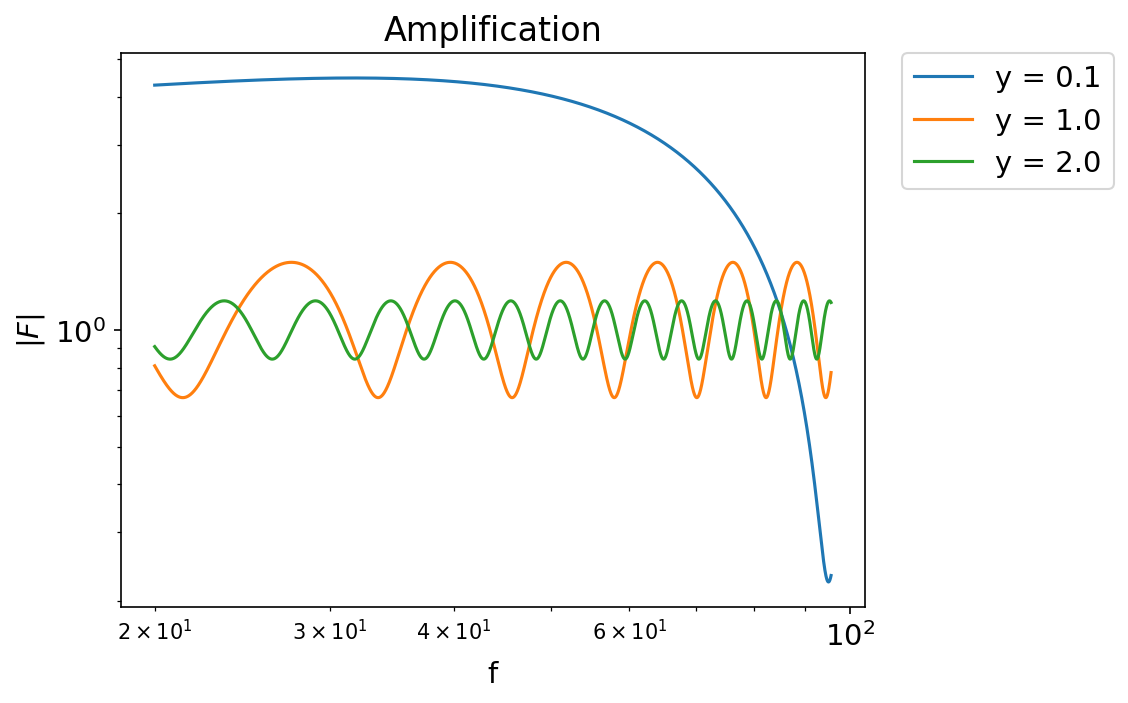

In [21]:
# make multiple plots for different values of y
lens_params = lens_params_1.copy()
y_range = np.array([0.1, 1, 2])

for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)

    plt.loglog(f_range, np.abs(amp_fact), label="y = {}".format(y))

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0, fontsize=14)
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$|F|$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Amplification", fontsize=16)

Text(0.5, 1.0, 'Lensed and Unlensed Strain')

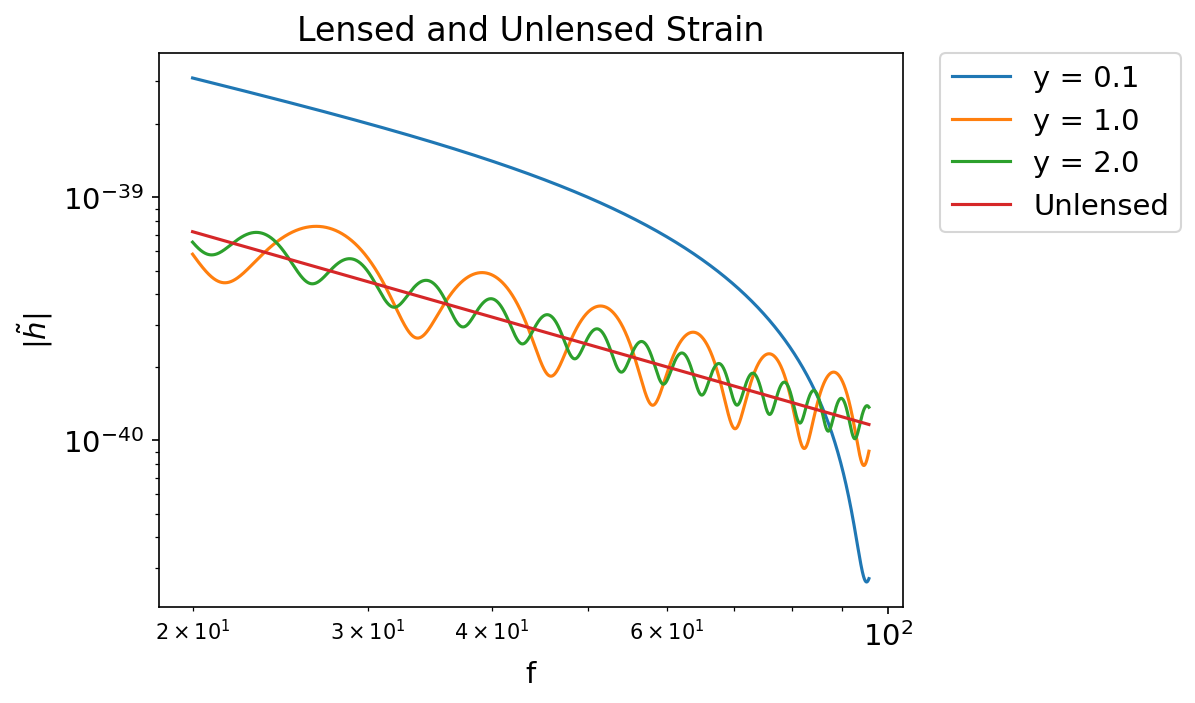

In [22]:
# make multiple plots for different values of y
lens_params = lens_params_1.copy()
y_range = np.array([0.1, 1, 2])

for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    lensed_strain = lens_inst.strain(f_range)

    plt.loglog(f_range, np.abs(lensed_strain), label="y = {}".format(y))

unlensed_strain = lens_inst.hI(f_range)
plt.loglog(f_range, np.abs(unlensed_strain), label="Unlensed")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0, fontsize=14)
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$|\~{h}|$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Lensed and Unlensed Strain", fontsize=16)

Text(0.5, 1.0, 'Amplifcation')

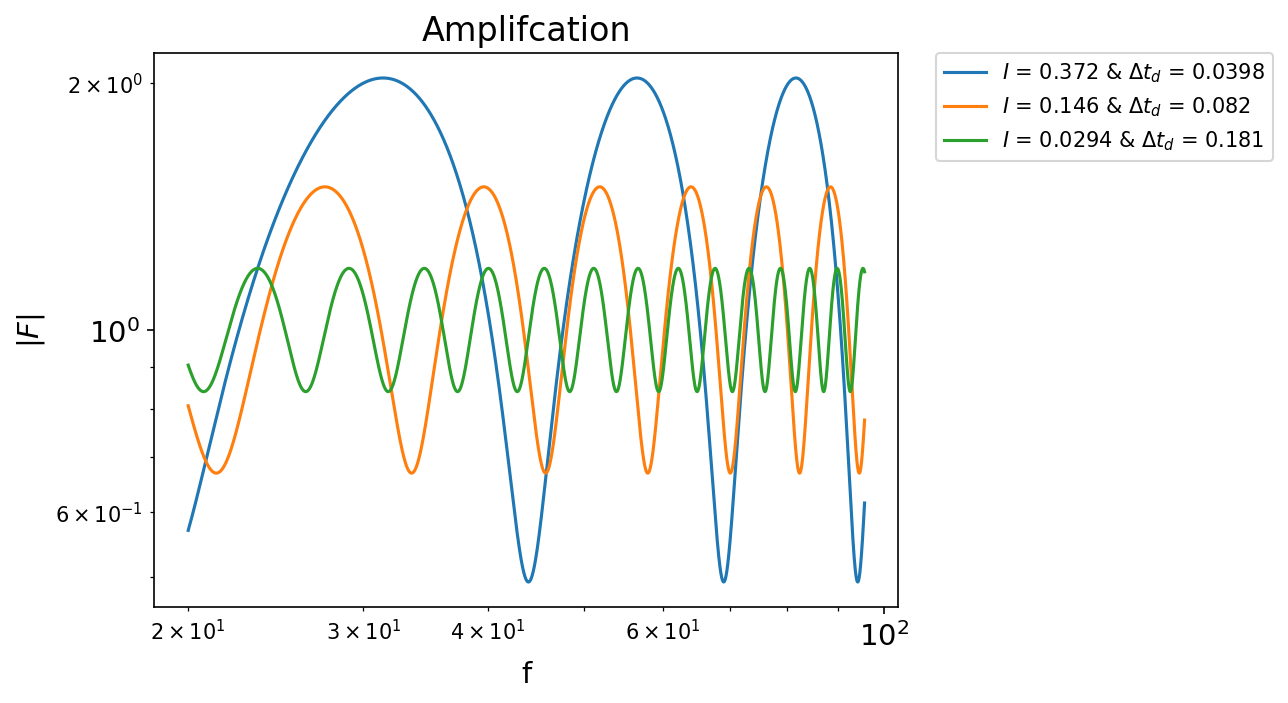

In [23]:
# make multiple plots for different values of y
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])

for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    Delta_td = lens_inst.Delta_td()

    plt.loglog(
        f_range,
        np.abs(amp_fact),
        label=r"$I$ = {:.3g} & $\Delta t_d$ = {:.3g}".format(I, Delta_td),
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$|F|$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Amplifcation", fontsize=16)

Text(0.5, 1.0, 'Lensed Strain')

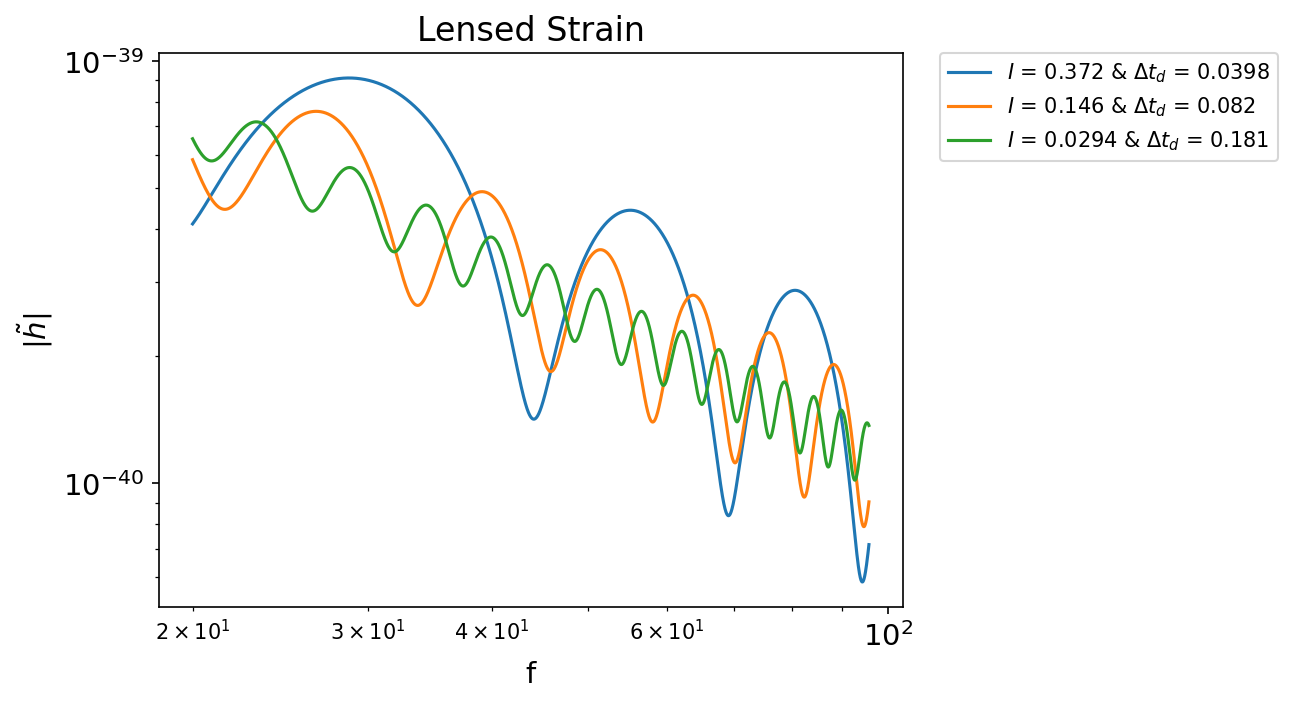

In [24]:
# make multiple plots for different values of y
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])

for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    lensed_strain = lens_inst.strain(f_range)
    I = lens_inst.I()
    Delta_td = lens_inst.Delta_td()

    plt.loglog(
        f_range,
        np.abs(lensed_strain),
        label=r"$I$ = {:.3g} & $\Delta t_d$ = {:.3g}".format(I, Delta_td),
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$|\~{h}|$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Lensed Strain", fontsize=16)

In [25]:
y_range = np.linspace(0.1, 3, 5)

I_range = np.array([])
for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    I_range = np.append(I_range, I)

print(I_range)


def to_divide(y):
    return 2 * (
        y * np.sqrt(y**2 + 4)
        + 2 * np.log((np.sqrt(y**2 + 4) + y) / (np.sqrt(y**2 + 4) - y))
    )


time_delay = 0.05
MLz_range = time_delay / to_divide(y_range)

print(MLz_range / solar_mass)

[0.81879891 0.20059558 0.05772244 0.02021452 0.00840395]
[12681.87690613  1496.42215785   749.15695753   470.21594993
   325.40132459]


Text(0.5, 1.0, 'Amplifcation')

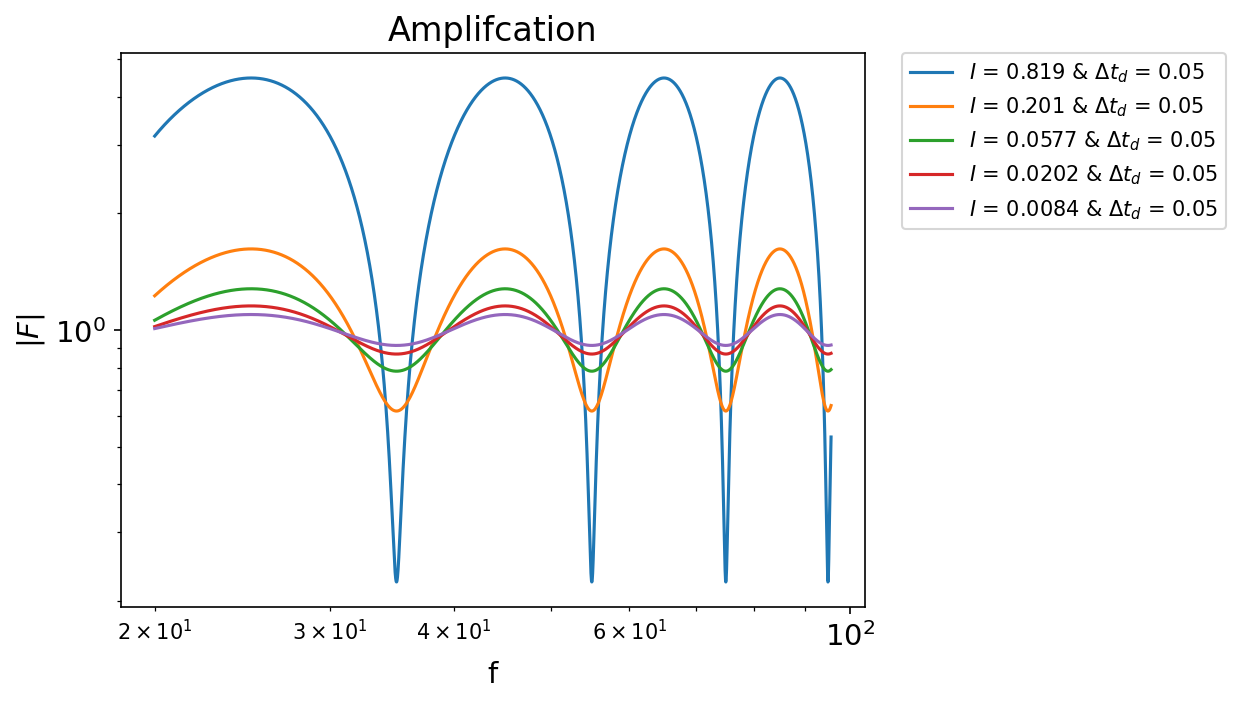

In [26]:
# make multiple plots for different values of y
lens_params = lens_params_1.copy()

for i in range(len(y_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i]
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    Delta_td = lens_inst.Delta_td()

    plt.loglog(
        f_range,
        np.abs(amp_fact),
        label=r"$I$ = {:.3g} & $\Delta t_d$ = {:.3g}".format(I, Delta_td),
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$|F|$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Amplifcation", fontsize=16)

Text(0.5, 1.0, 'Amplification')

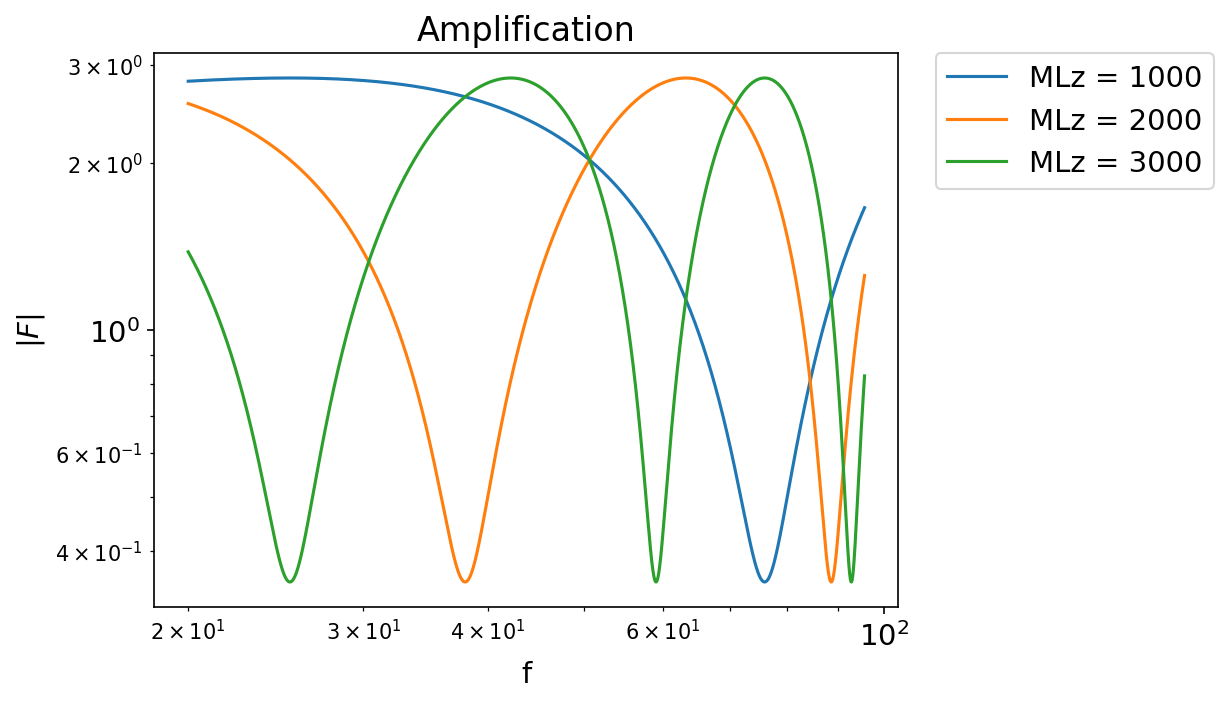

In [27]:
# make multiple plots for different values of MLz
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)

    plt.loglog(f_range, np.abs(amp_fact), label="MLz = {:.4g}".format(MLz))

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0, fontsize=14)
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$|F|$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Amplification", fontsize=16)

Text(0.5, 1.0, 'Lensed and Unlensed Strain')

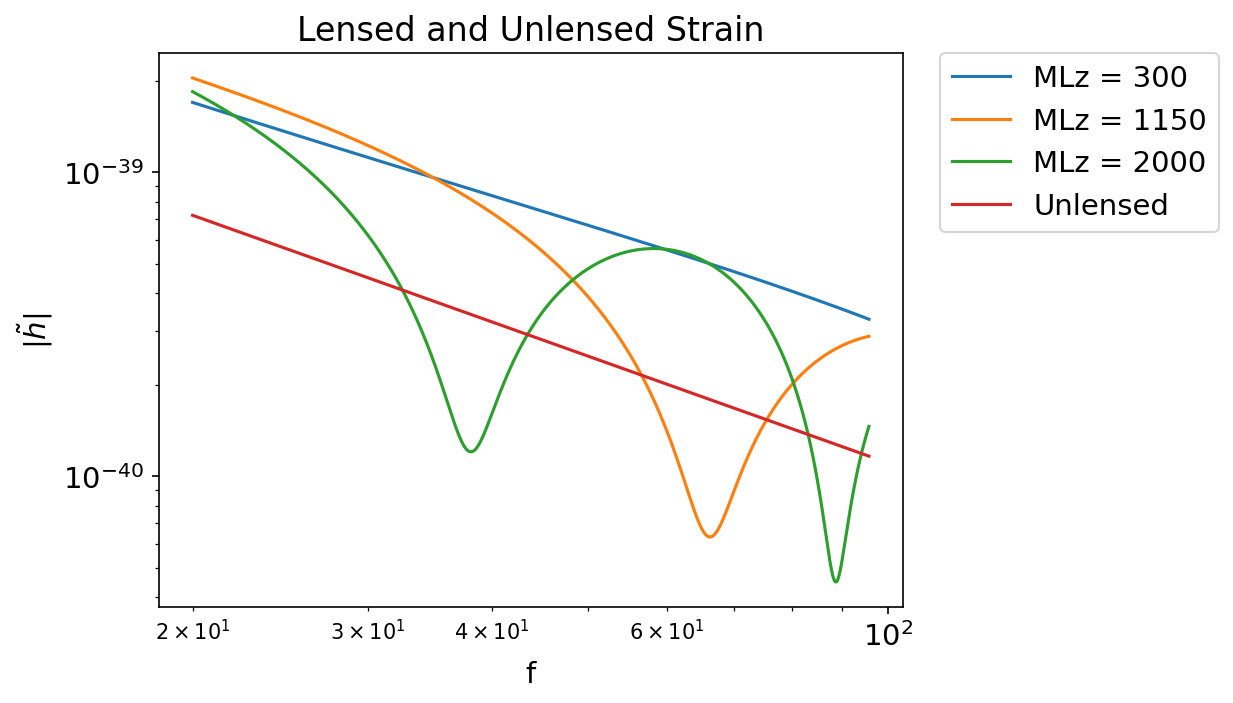

In [28]:
# make multiple plots for different values of MLz
lens_params = lens_params_1.copy()
MLz_range = np.linspace(1e3 - 7e2, 1e3 + 1e3, 3)

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    lensed_strain = lens_inst.strain(f_range)

    plt.loglog(f_range, np.abs(lensed_strain), label="MLz = {:.4g}".format(MLz))

unlensed_strain = lens_inst.hI(f_range)
plt.loglog(f_range, np.abs(unlensed_strain), label="Unlensed")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0, fontsize=14)
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$|\~{h}|$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Lensed and Unlensed Strain", fontsize=16)

Text(0.5, 1.0, 'Amplifcation')

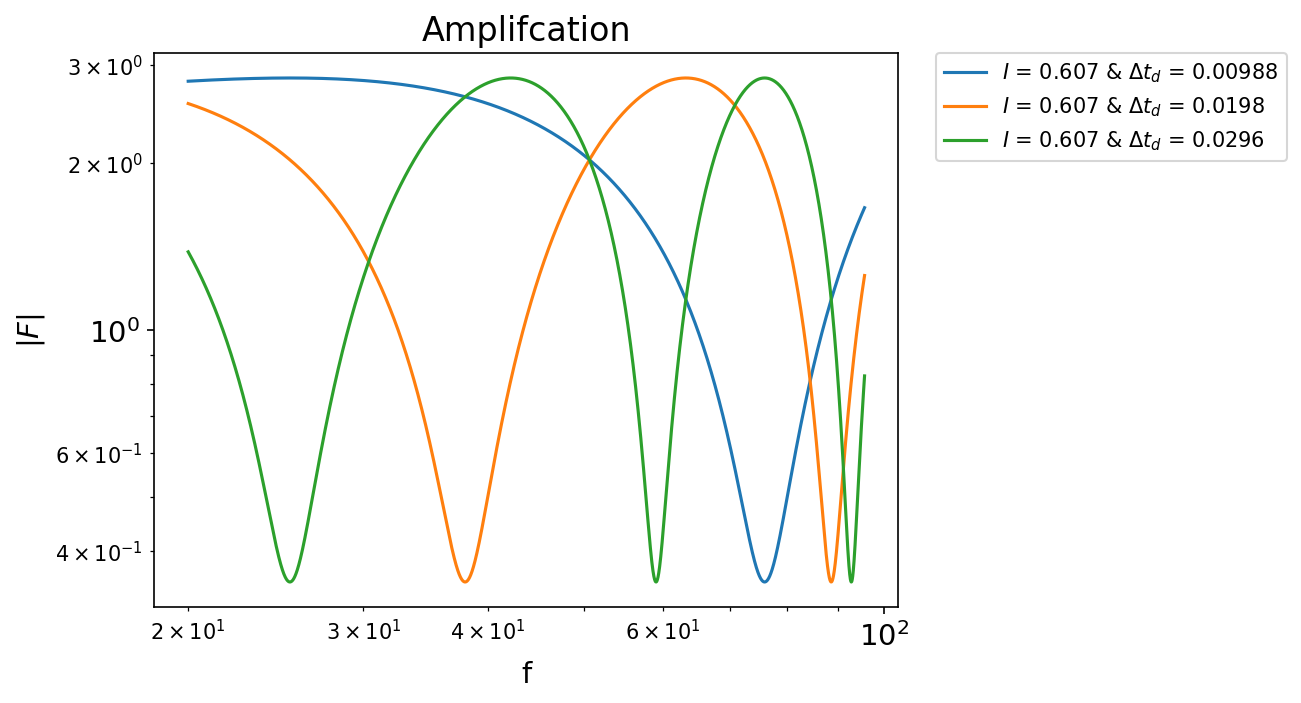

In [29]:
# make multiple plots for different values of MLz
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    Delta_td = lens_inst.Delta_td()

    plt.loglog(
        f_range,
        np.abs(amp_fact),
        label=r"$I$ = {:.3g} & $\Delta t_d$ = {:.3g}".format(I, Delta_td),
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$|F|$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Amplifcation", fontsize=16)

Text(0.5, 1.0, 'Lensed and Unlensed Strain')

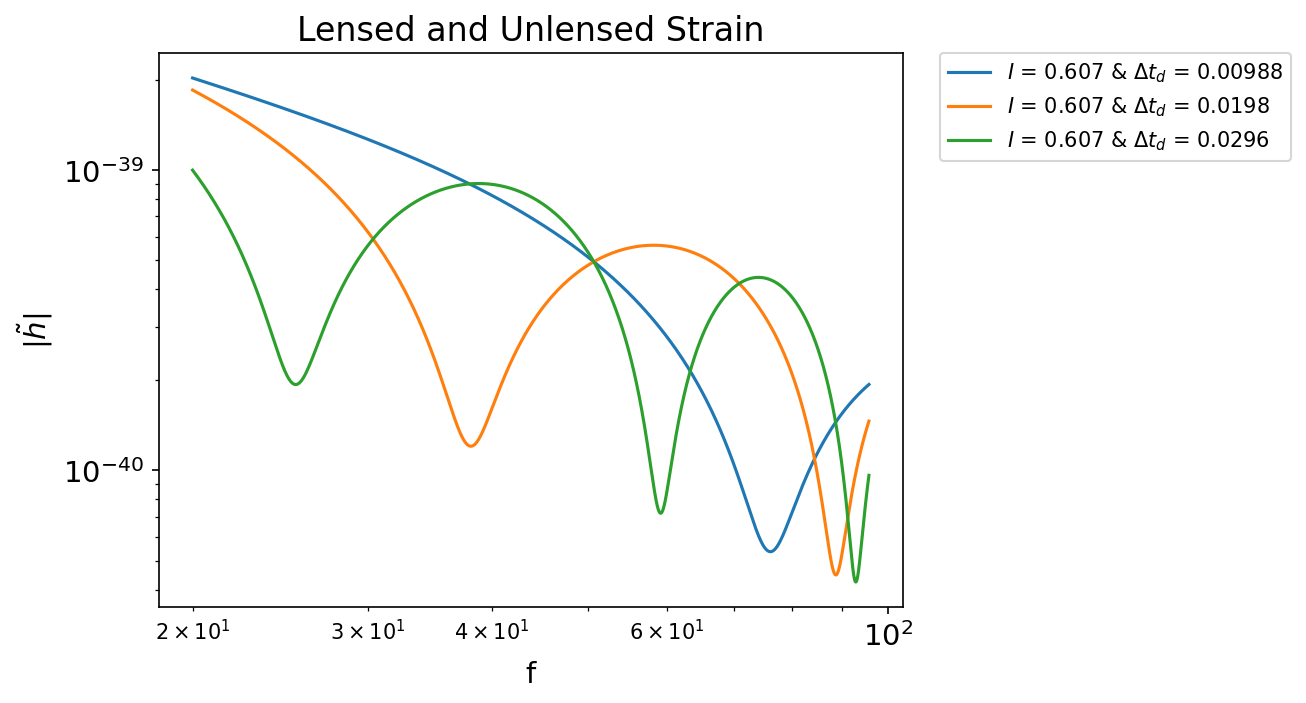

In [30]:
# make multiple plots for different values of MLz
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    lensed_strain = lens_inst.strain(f_range)
    I = lens_inst.I()
    Delta_td = lens_inst.Delta_td()

    plt.loglog(
        f_range,
        np.abs(lensed_strain),
        label=r"$I$ = {:.3g} & $\Delta t_d$ = {:.3g}".format(I, Delta_td),
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$|\~{h}|$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Lensed and Unlensed Strain", fontsize=16)

## plot phase diff

Text(0.5, 1.0, 'Phase Difference between Lensed & Unlensed')

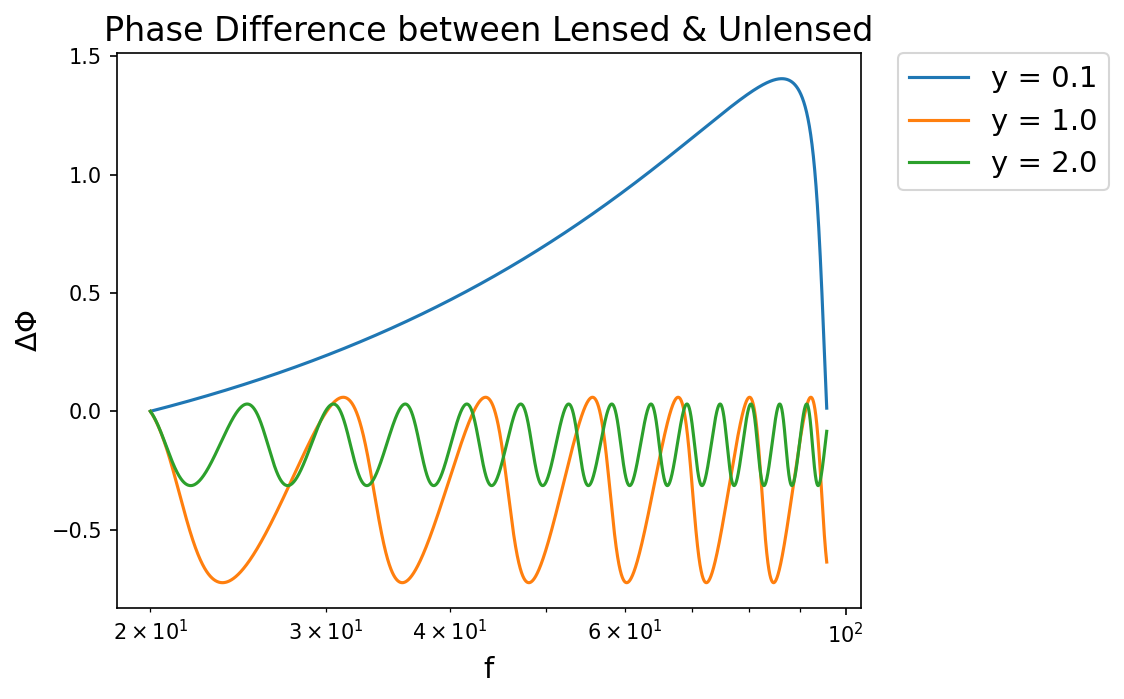

In [31]:
# make multiple plots for different values of y
lens_params = lens_params_1.copy()
y_range = np.array([0.1, 1, 2])

for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    lensed_strain = lens_inst.strain(f_range)
    unlensed_strain = lens_inst.hI(f_range)

    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_UL = np.unwrap(np.angle(unlensed_strain))

    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    plt.plot(f_range, phase_diff, label="y = {}".format(y))

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0, fontsize=14)
plt.xscale("log")
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$\Delta \Phi$", fontsize=14)
plt.title("Phase Difference between Lensed & Unlensed", fontsize=16)

Text(0.5, 1.0, 'Phase Difference between Lensed & Unlensed')

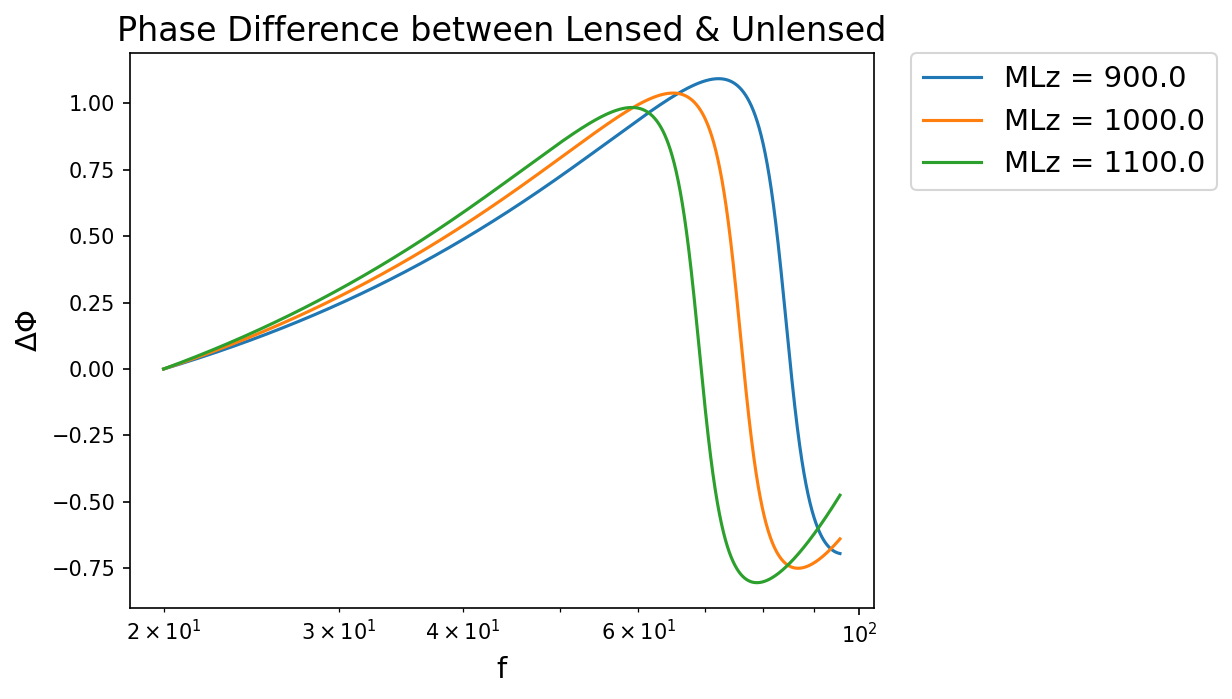

In [32]:
# make multiple plots for different values of MLz
lens_params = lens_params_1.copy()
MLz_range = np.linspace(1e3 - 1e2, 1e3 + 1e2, 3)

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    phase_L = np.unwrap(np.angle(amp_fact * unlensed_strain))
    phase_UL = np.unwrap(np.angle(unlensed_strain))

    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    plt.plot(f_range, phase_diff, label="MLz = {}".format(MLz))

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0, fontsize=14)
plt.xscale("log")
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$\Delta \Phi$", fontsize=14)
plt.title("Phase Difference between Lensed & Unlensed", fontsize=16)

In [33]:
y_range = np.linspace(0.1, 3, 5)

I_range = np.array([])
for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    I_range = np.append(I_range, I)

print(I_range)


def to_divide(y):
    return 2 * (
        y * np.sqrt(y**2 + 4)
        + 2 * np.log((np.sqrt(y**2 + 4) + y) / (np.sqrt(y**2 + 4) - y))
    )


time_delay = 0.05
MLz_range = time_delay / to_divide(y_range)

print(MLz_range / solar_mass)

[0.81879891 0.20059558 0.05772244 0.02021452 0.00840395]
[12681.87690613  1496.42215785   749.15695753   470.21594993
   325.40132459]


Text(0.5, 1.0, 'Amplifcation')

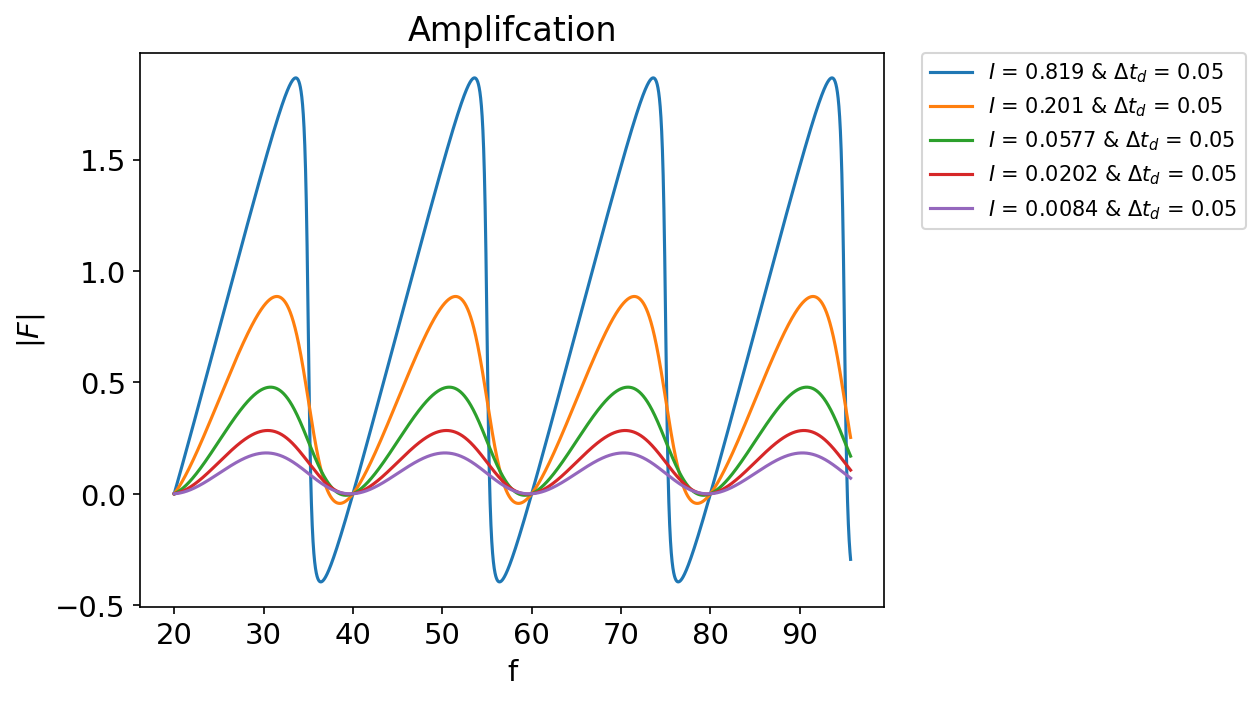

In [34]:
# make multiple plots for different values of y
lens_params = lens_params_1.copy()

for i in range(len(y_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i]
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    I = lens_inst.I()
    Delta_td = lens_inst.Delta_td()

    lensed_strain = lens_inst.strain(f_range)
    unlensed_strain = lens_inst.hI(f_range)

    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_UL = np.unwrap(np.angle(unlensed_strain))

    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    plt.plot(
        f_range,
        phase_diff,
        label=r"$I$ = {:.3g} & $\Delta t_d$ = {:.3g}".format(I, Delta_td),
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$|F|$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Amplifcation", fontsize=16)

Text(0.5, 1.0, 'Amplifcation')

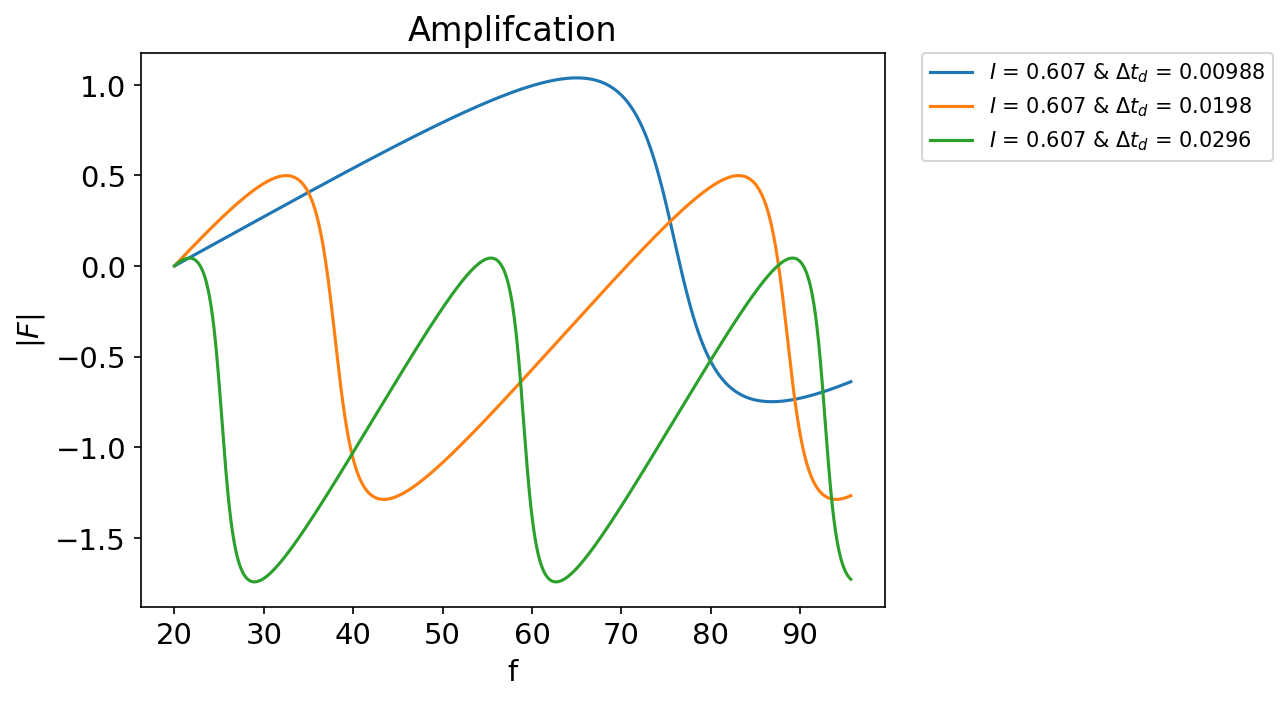

In [35]:
# make multiple plots for different values of MLz
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    Delta_td = lens_inst.Delta_td()

    lensed_strain = lens_inst.strain(f_range)
    unlensed_strain = lens_inst.hI(f_range)

    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_UL = np.unwrap(np.angle(unlensed_strain))

    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    plt.plot(
        f_range,
        phase_diff,
        label=r"$I$ = {:.3g} & $\Delta t_d$ = {:.3g}".format(I, Delta_td),
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.xlabel("f", fontsize=14)
plt.ylabel(r"$|F|$", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Amplifcation", fontsize=16)

## side by side plots

Text(0.5, 1.0, 'Phase Difference')

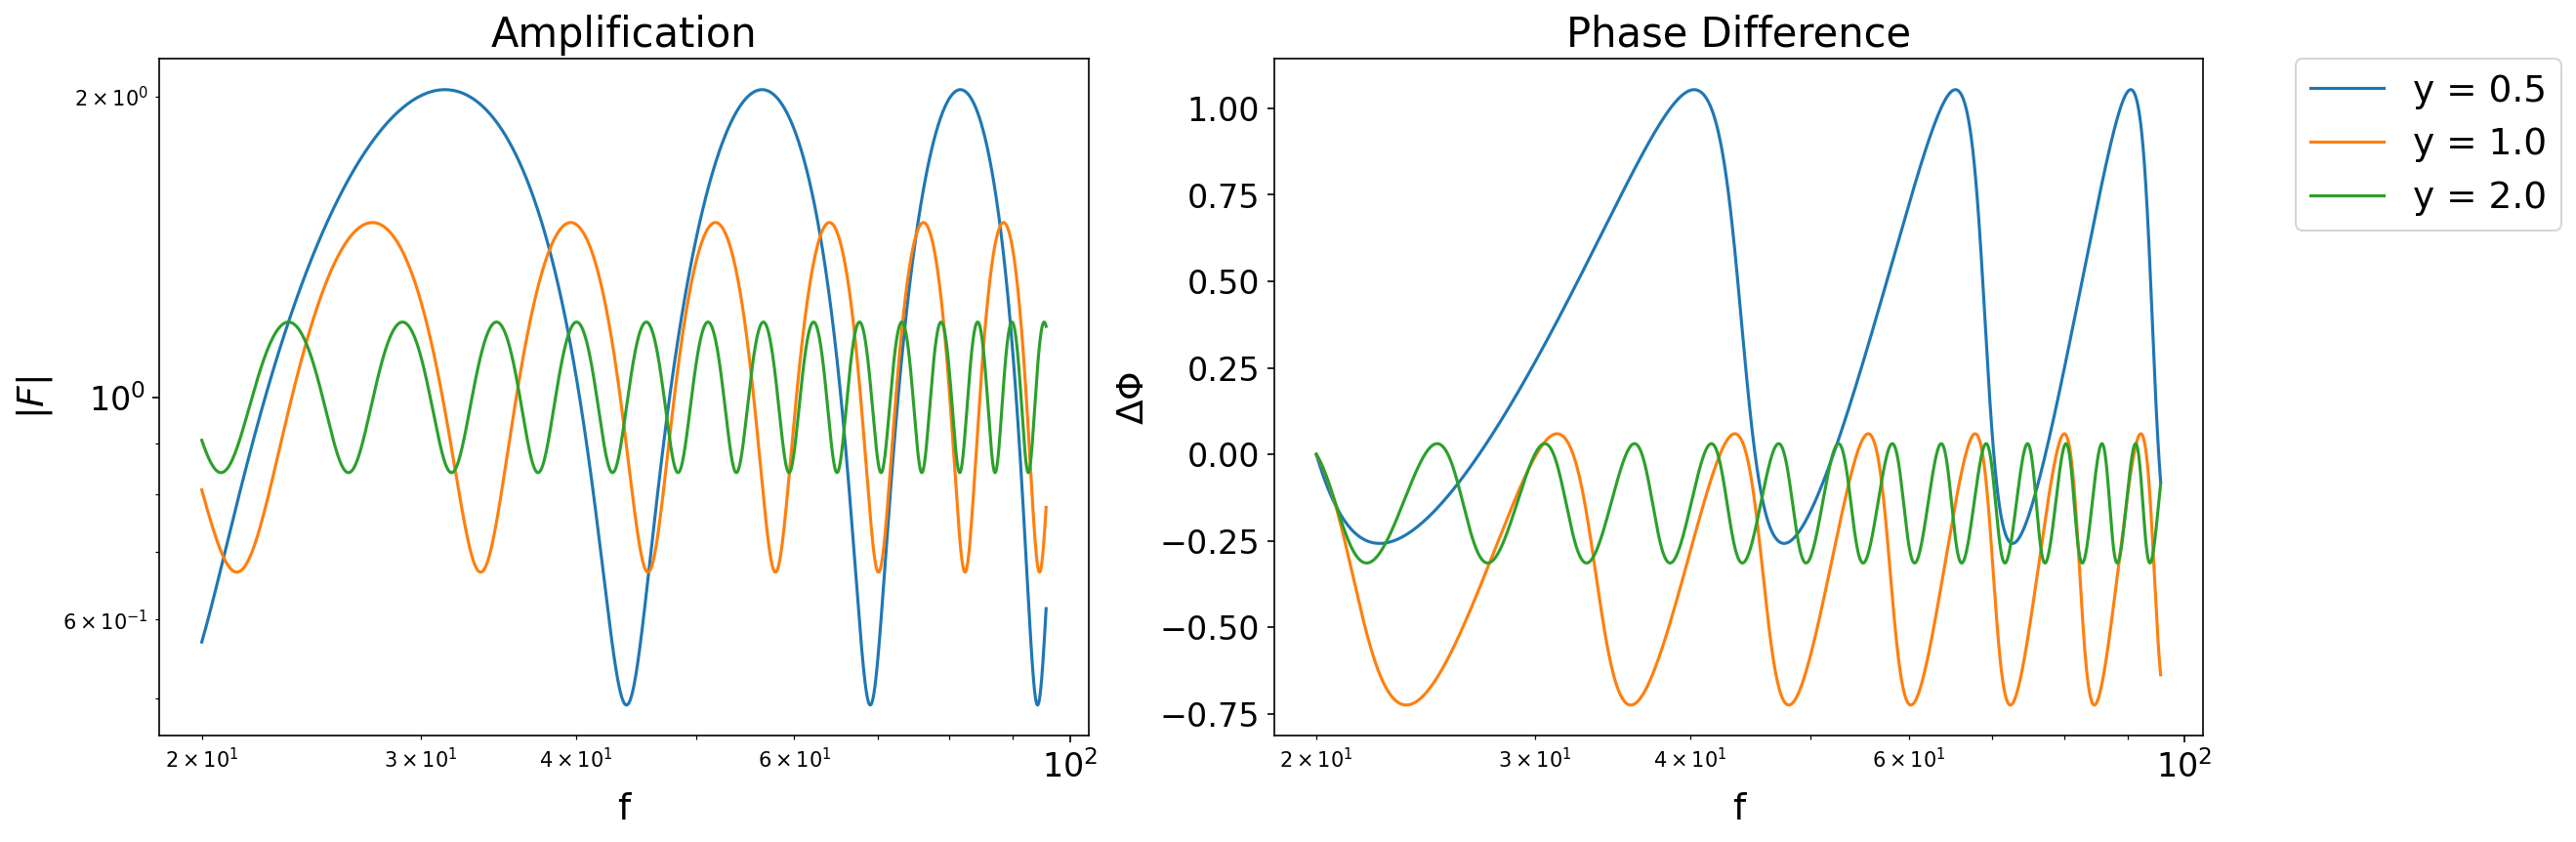

In [36]:
# plot amplification and phase diff for different values of y side by side
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0].loglog(f_range, np.abs(amp_fact), label="y = {}".format(y))
    axes[1].plot(f_range, phase_diff, label="y = {}".format(y))

axes[0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=18
)
axes[0].set_xlabel("f", fontsize=18)
axes[0].set_ylabel(r"$|F|$", fontsize=18)
axes[0].tick_params(axis="both", which="major", labelsize=16)
axes[0].set_title("Amplification", fontsize=20)

axes[1].set_xscale("log")
axes[1].set_xlabel("f", fontsize=18)
axes[1].set_ylabel(r"$\Delta \Phi$", fontsize=18)
axes[1].tick_params(axis="both", which="major", labelsize=16)
axes[1].set_title("Phase Difference", fontsize=20)

Text(0.5, 1.0, 'Phase Difference')

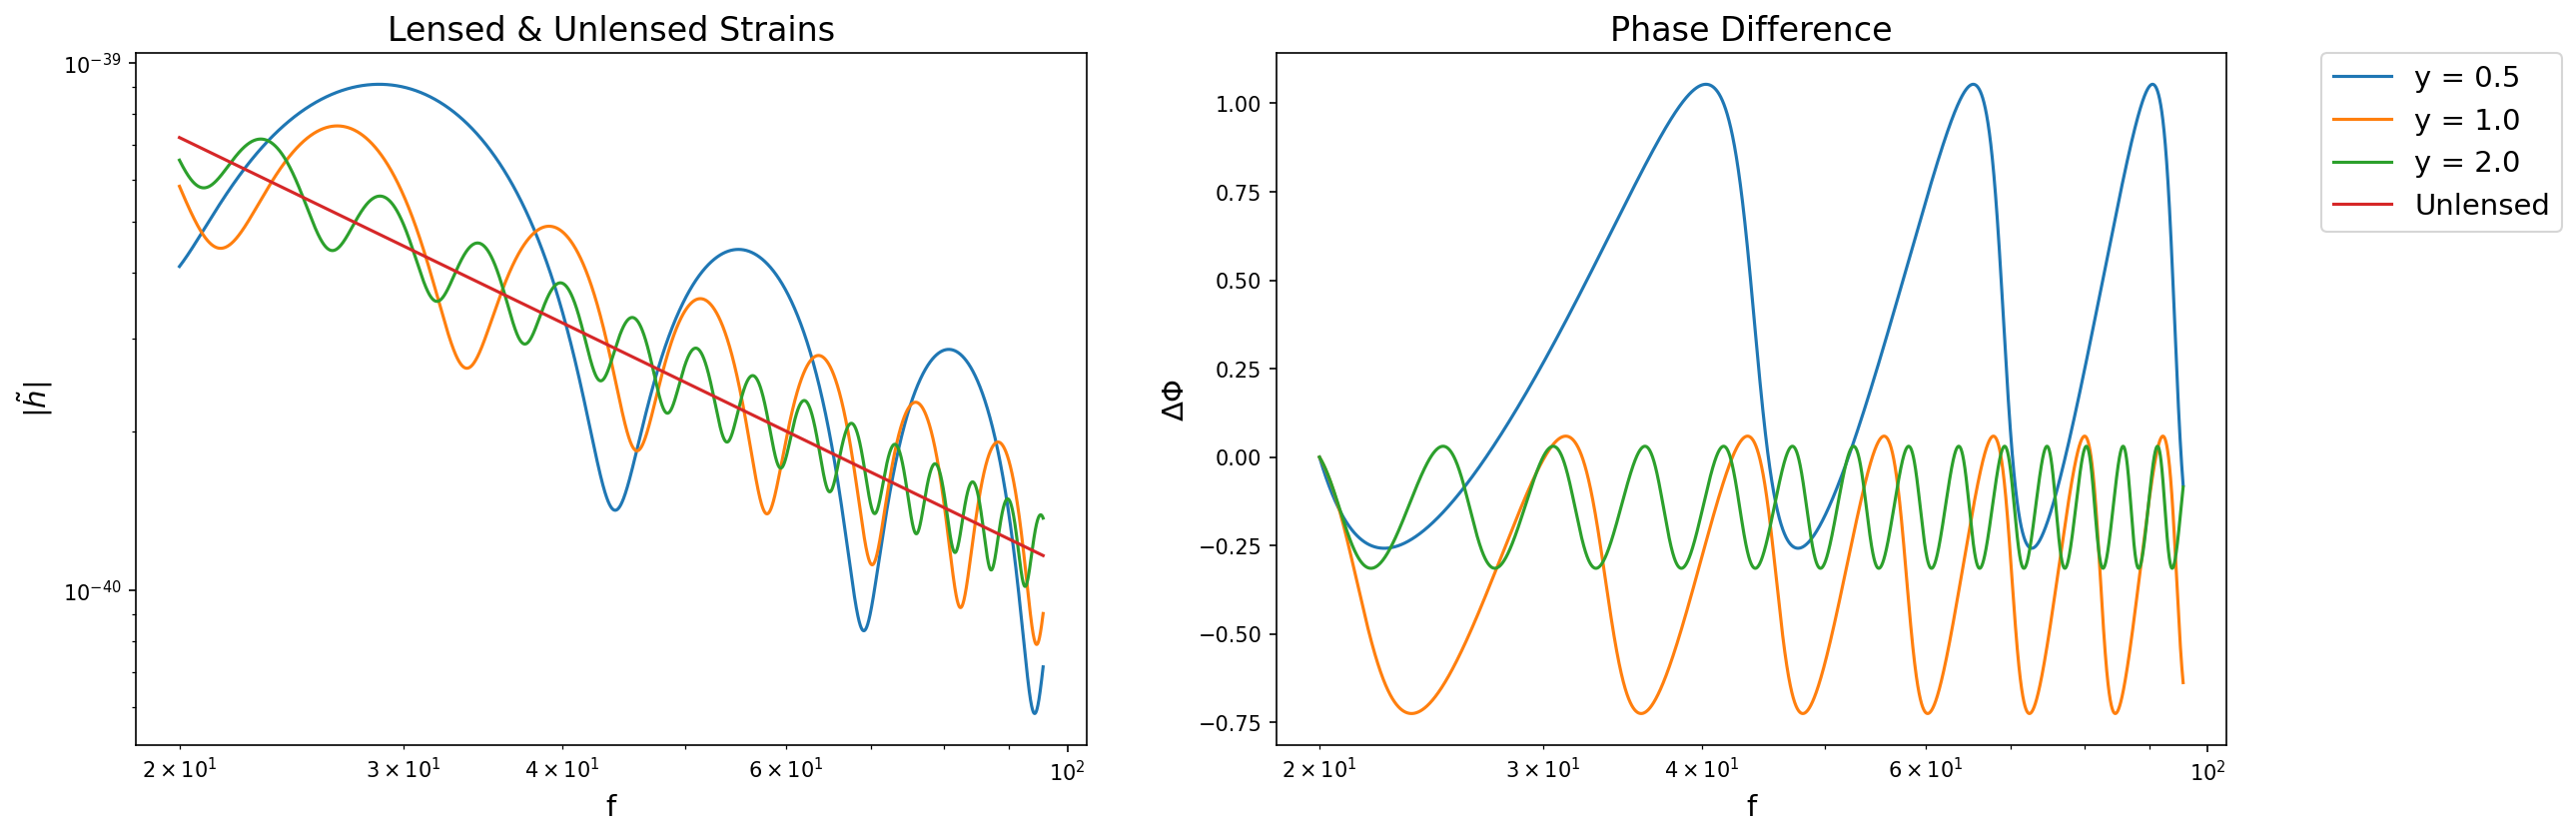

In [37]:
# plot strain and phase diff for different values of y side by side
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0].loglog(f_range, np.abs(lensed_strain), label="y = {}".format(y))
    axes[1].plot(f_range, phase_diff, label="y = {}".format(y))

axes[0].loglog(f_range, np.abs(unlensed_strain), label="Unlensed")
axes[0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=14
)
axes[0].set_xlabel("f", fontsize=14)
axes[0].set_ylabel(r"$|\~{h}|$", fontsize=14)
axes[0].set_title("Lensed & Unlensed Strains", fontsize=16)

axes[1].set_xscale("log")
axes[1].set_xlabel("f", fontsize=14)
axes[1].set_ylabel(r"$\Delta \Phi$", fontsize=14)
axes[1].set_title("Phase Difference", fontsize=16)

In [38]:
# plot amplification and phase diff for different values of MLz side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0].loglog(f_range, np.abs(amp_fact), label="$M_L$ = {:.4g}".format(MLz))
    axes[1].plot(f_range, phase_diff, label="$M_L$ = {:.4g}".format(MLz))

axes[0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=18
)
axes[0].set_xlabel("f", fontsize=18)
axes[0].set_ylabel(r"$|F|$", fontsize=18)
axes[0].tick_params(axis="both", which="major", labelsize=16)
axes[0].set_title("Amplification", fontsize=20)

axes[1].set_xscale("log")
axes[1].set_xlabel("f", fontsize=18)
axes[1].set_ylabel(r"$\Delta \Phi$", fontsize=18)
axes[1].tick_params(axis="both", which="major", labelsize=16)
axes[1].set_title("Phase Difference", fontsize=20)

Text(0.5, 1.0, 'Phase Difference')

Text(0.5, 1.0, 'Phase Difference')

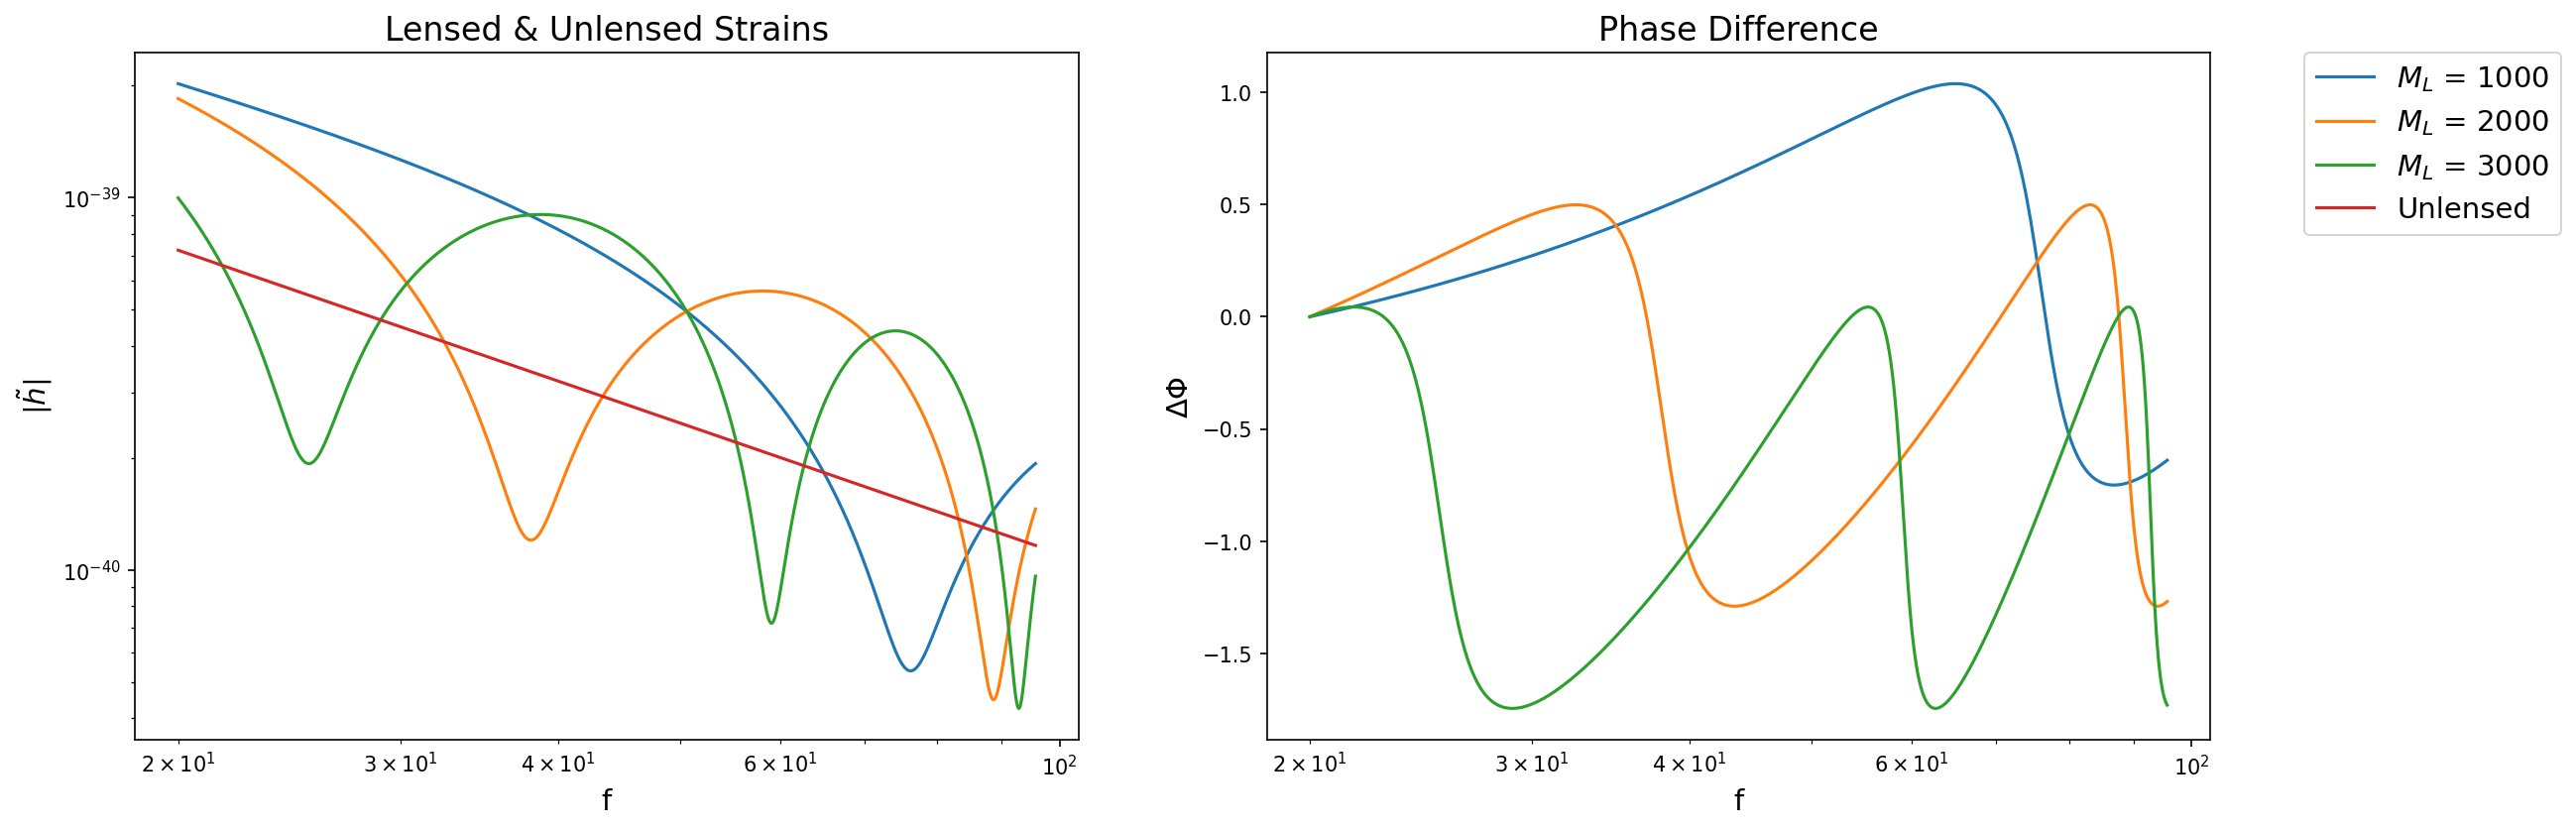

In [39]:
# similar plot for different values of MLz
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0].loglog(f_range, np.abs(lensed_strain), label="$M_L$ = {:.4g}".format(MLz))
    axes[1].plot(f_range, phase_diff, label="$M_L$ = {:.4g}".format(MLz))

axes[0].loglog(f_range, np.abs(unlensed_strain), label="Unlensed")
axes[0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=14
)
axes[0].set_xlabel("f", fontsize=14)
axes[0].set_ylabel(r"$|\~{h}|$", fontsize=14)
axes[0].set_title("Lensed & Unlensed Strains", fontsize=16)

axes[1].set_xscale("log")
axes[1].set_xlabel("f", fontsize=14)
axes[1].set_ylabel(r"$\Delta \Phi$", fontsize=14)
axes[1].set_title("Phase Difference", fontsize=16)

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of MLz side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ["-", "--", ":"]  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].loglog(
        f_range,
        np.abs(amp_fact),
        linestyle=line_styles[i],
        color="black",
        label="$M_L$ = {:.4g}".format(MLz),
    )
    axes[0, 1].plot(
        f_range,
        phase_diff,
        linestyle=line_styles[i],
        color="black",
        label="$M_L$ = {:.4g}".format(MLz),
    )

axes[0, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Amplification", fontsize=24)

axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of y side by side
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])
line_styles = ["-", "--", ":"]  # Define the line styles

for i, y in enumerate(y_range):
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].loglog(
        f_range,
        np.abs(amp_fact),
        linestyle=line_styles[i],
        color="black",
        label="$y$ = {}".format(y),
    )
    axes[1, 1].plot(
        f_range,
        phase_diff,
        linestyle=line_styles[i],
        color="black",
        label="$y$ = {}".format(y),
    )

axes[1, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[1, 0].set_xlabel("f", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|F|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.50, 0.5, r"$\Delta \Phi$", va="center", rotation="vertical", fontsize=24)

Text(0.5, 0.5, '$\\Delta \\Phi$')

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of MLz side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ["-", "--", ":"]  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(
        f_range,
        np.abs(amp_fact),
        linestyle=line_styles[i],
        color="black",
        label="$M_L$ = {:.4g} {}".format(MLz, r"$M_{\odot}$"),
    )
    axes[0, 1].plot(
        f_range,
        phase_diff,
        linestyle=line_styles[i],
        color="black",
        label="$M_L$ = {:.4g} {}".format(MLz, r"$M_{\odot}$"),
    )

axes[0, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Amplification", fontsize=24)

# axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of y side by side
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])
line_styles = ["-", "--", ":"]  # Define the line styles

for i, y in enumerate(y_range):
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(
        f_range,
        np.abs(amp_fact),
        linestyle=line_styles[i],
        color="black",
        label="$y$ = {}".format(y),
    )
    axes[1, 1].plot(
        f_range,
        phase_diff,
        linestyle=line_styles[i],
        color="black",
        label="$y$ = {}".format(y),
    )

axes[1, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|F|$", va="center", rotation="vertical", fontsize=24)
fig.text(
    0.49,
    0.5,
    r"$\Phi_L - \Phi_{UL}$ (rad)",
    va="center",
    rotation="vertical",
    fontsize=24,
)

Text(0.49, 0.5, '$\\Phi_L - \\Phi_{UL}$ (rad)')

Text(0.49, 0.5, '$\\Phi_L - \\Phi_{UL}$ (rad)')

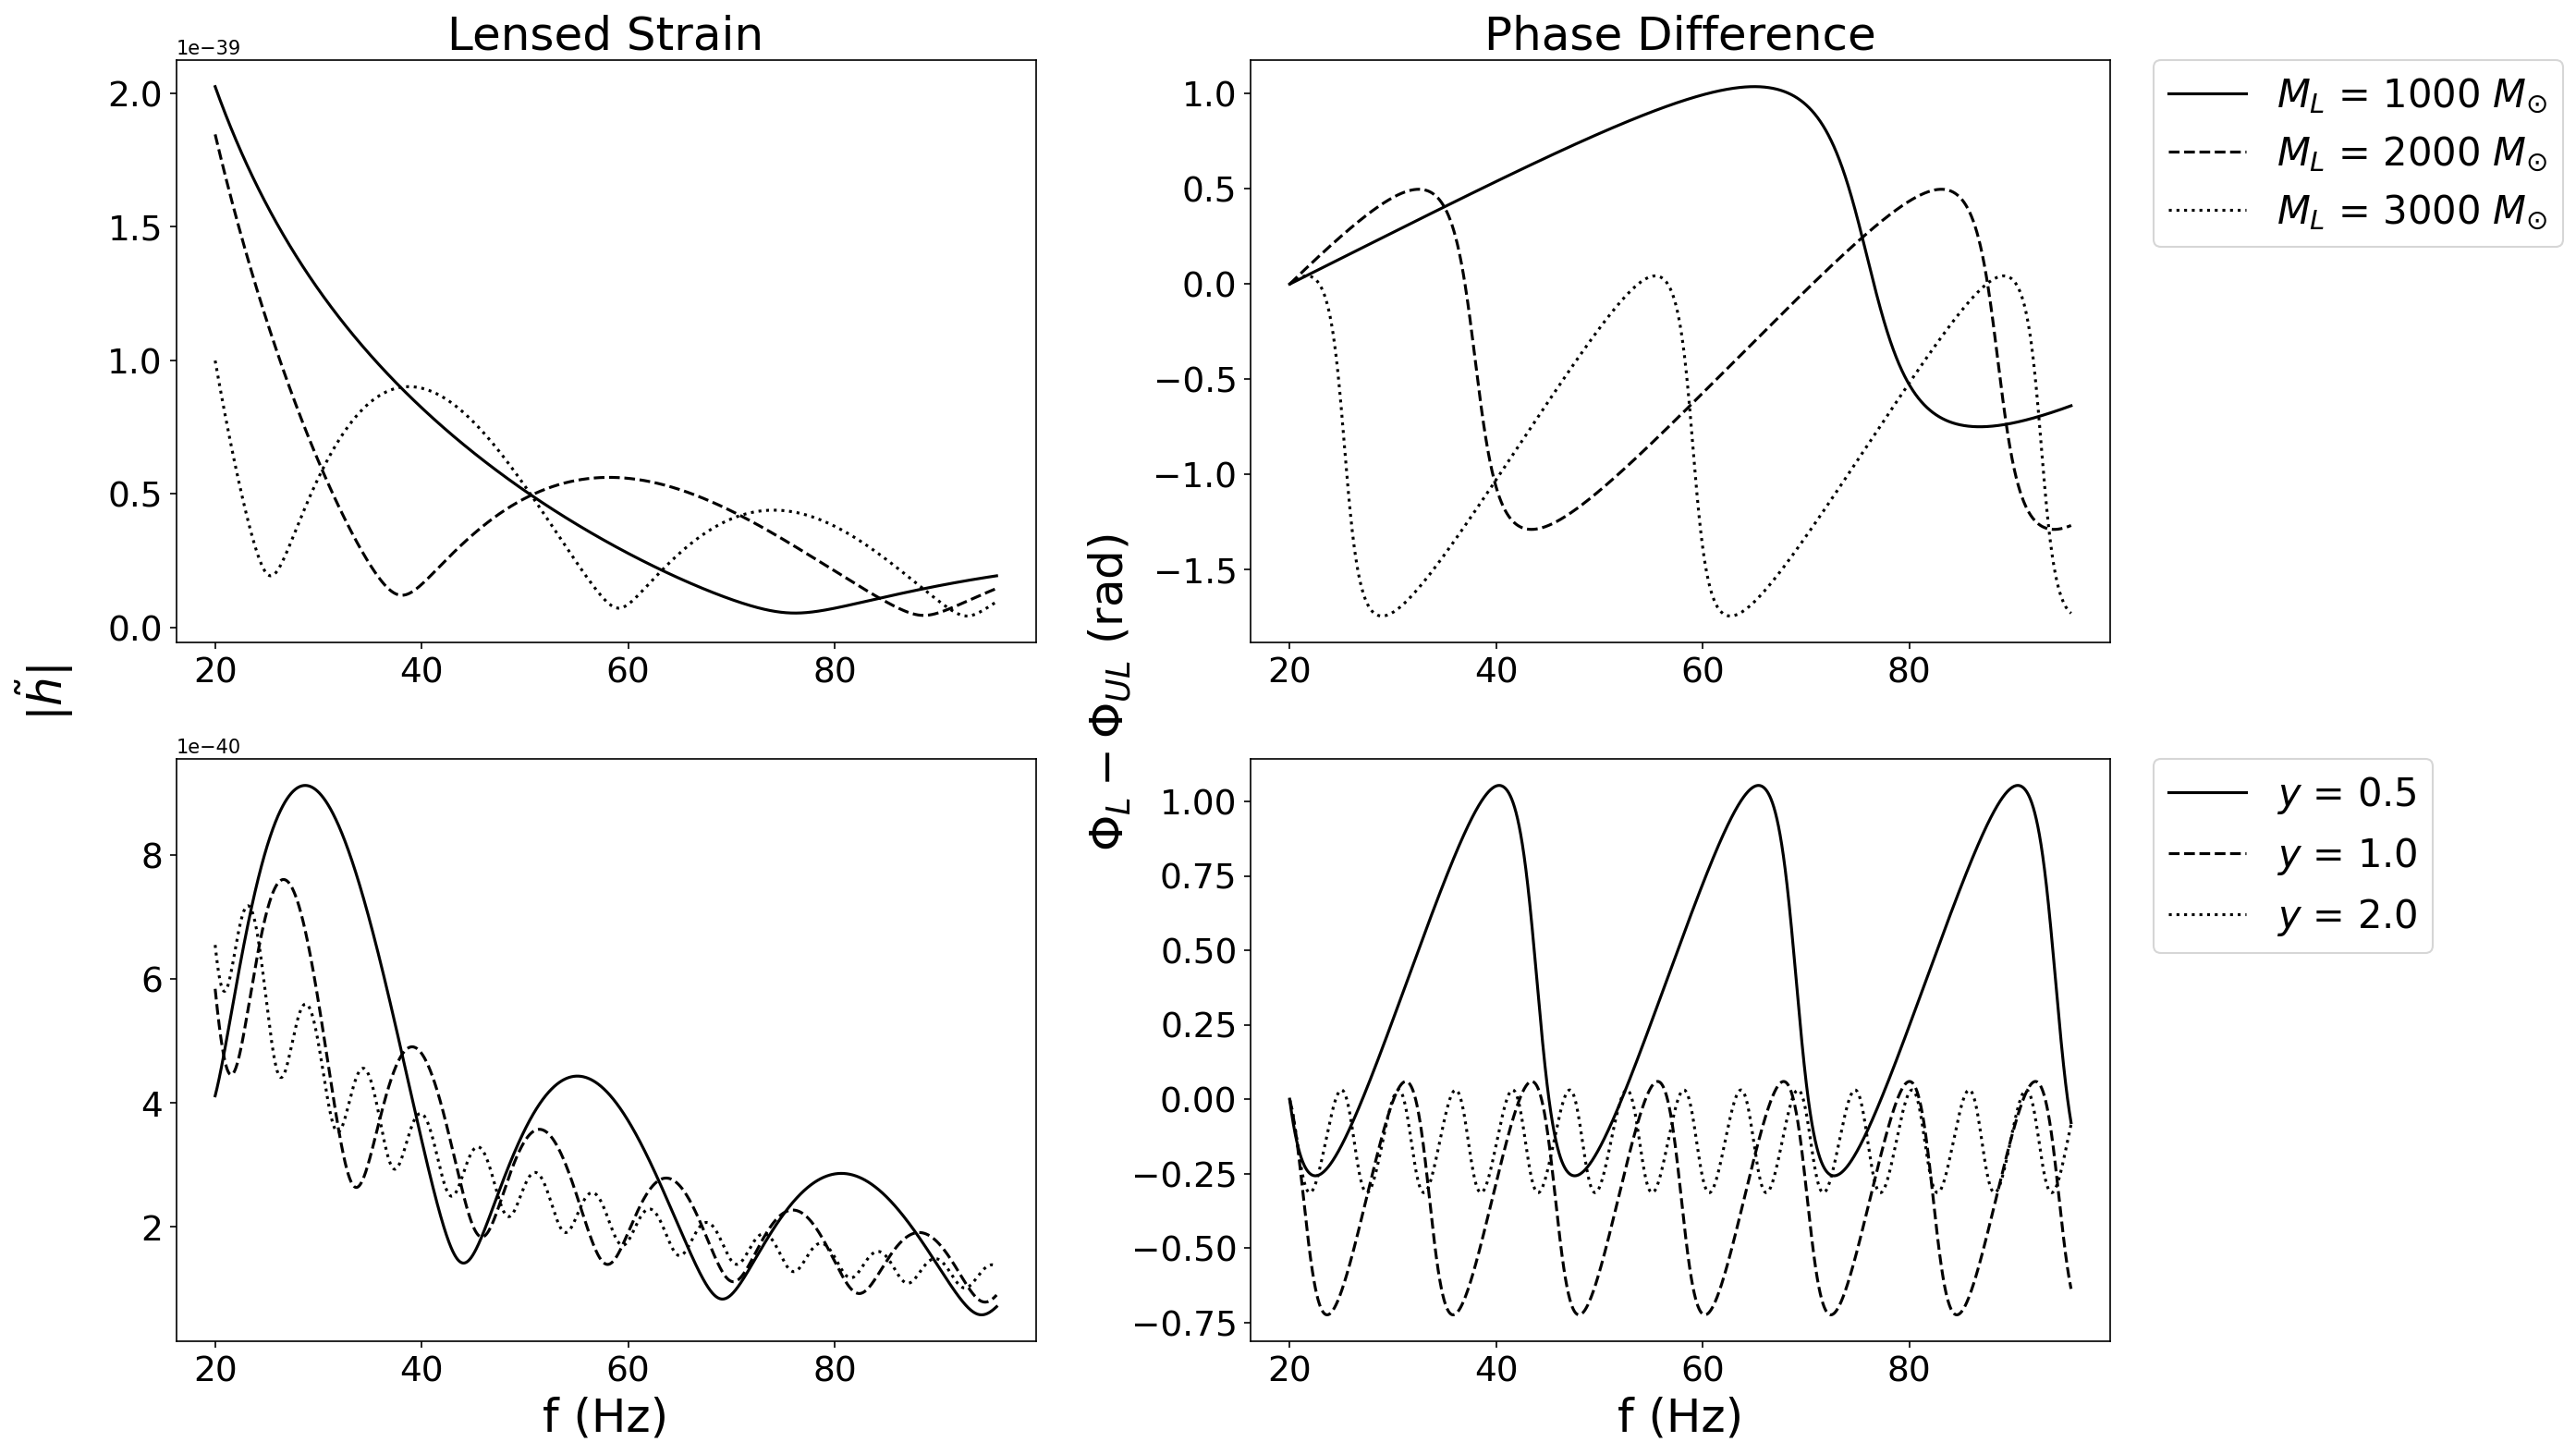

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of MLz side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ["-", "--", ":"]  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(
        f_range,
        np.abs(lensed_strain),
        linestyle=line_styles[i],
        color="black",
        label="$M_L$ = {:.4g} {}".format(MLz, r"$M_{\odot}$"),
    )
    axes[0, 1].plot(
        f_range,
        phase_diff,
        linestyle=line_styles[i],
        color="black",
        label="$M_L$ = {:.4g} {}".format(MLz, r"$M_{\odot}$"),
    )

axes[0, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Lensed Strain", fontsize=24)

# axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of y side by side
lens_params = lens_params_1.copy()
y_range = np.array([0.5, 1, 2])
line_styles = ["-", "--", ":"]  # Define the line styles

for i, y in enumerate(y_range):
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(
        f_range,
        np.abs(lensed_strain),
        linestyle=line_styles[i],
        color="black",
        label="$y$ = {}".format(y),
    )
    axes[1, 1].plot(
        f_range,
        phase_diff,
        linestyle=line_styles[i],
        color="black",
        label="$y$ = {}".format(y),
    )

axes[1, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(
    0.49,
    0.5,
    r"$\Phi_L - \Phi_{UL}$ (rad)",
    va="center",
    rotation="vertical",
    fontsize=24,
)

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of time delay but same I side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ["-", "--", ":"]  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    Delta_td = lens_inst.Delta_td()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(
        f_range,
        np.abs(amp_fact),
        linestyle=line_styles[i],
        color="black",
        label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000),
    )
    axes[0, 1].plot(
        f_range,
        phase_diff,
        linestyle=line_styles[i],
        color="black",
        label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000),
    )

axes[0, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Amplification", fontsize=24)

# axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of I but same time delay side by side

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 2, 3)
y_range = y_range[::-1]

I_range = np.array([])
for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    I_range = np.append(I_range, I)


def to_divide(y):
    return 2 * (
        y * np.sqrt(y**2 + 4)
        + 2 * np.log((np.sqrt(y**2 + 4) + y) / (np.sqrt(y**2 + 4) - y))
    )


time_delay = 0.05
MLz_range = time_delay / to_divide(y_range)

lens_params = lens_params_1.copy()
line_styles = ["-", "--", ":"]  # Define the line styles

for i in range(len(y_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i]
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(
        f_range,
        np.abs(amp_fact),
        linestyle=line_styles[i],
        color="black",
        label="$I$ = {:.2g}".format(I),
    )
    axes[1, 1].plot(
        f_range,
        phase_diff,
        linestyle=line_styles[i],
        color="black",
        label="$I$ = {:.2g}".format(I),
    )

axes[1, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|F|$", va="center", rotation="vertical", fontsize=24)
fig.text(
    0.49,
    0.5,
    r"$\Phi_L - \Phi_{UL}$ (rad)",
    va="center",
    rotation="vertical",
    fontsize=24,
)

Text(0.49, 0.5, '$\\Phi_L - \\Phi_{UL}$ (rad)')

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

# plot amplification and phase diff for different values of time delay but same I side by side
lens_params = lens_params_1.copy()
MLz_range = np.array([1e3, 2e3, 3e3])
line_styles = ["-", "--", ":"]  # Define the line styles

for i, MLz in enumerate(MLz_range):
    lens_params["MLz"] = MLz * solar_mass
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    Delta_td = lens_inst.Delta_td()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(
        f_range,
        np.abs(lensed_strain),
        linestyle=line_styles[i],
        color="black",
        label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000),
    )
    axes[0, 1].plot(
        f_range,
        phase_diff,
        linestyle=line_styles[i],
        color="black",
        label=r"$\Delta t_d$ = {:.2g} ms".format(Delta_td * 1000),
    )

axes[0, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Lensed Strain", fontsize=24)

# axes[0, 1].set_xscale("log")
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

# plot amplification and phase diff for different values of I but same time delay side by side

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 2, 3)
y_range = y_range[::-1]

I_range = np.array([])
for y in y_range:
    lens_params["y"] = y
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)
    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    I_range = np.append(I_range, I)


def to_divide(y):
    return 2 * (
        y * np.sqrt(y**2 + 4)
        + 2 * np.log((np.sqrt(y**2 + 4) + y) / (np.sqrt(y**2 + 4) - y))
    )


time_delay = 0.05
MLz_range = time_delay / to_divide(y_range)

lens_params = lens_params_1.copy()
line_styles = ["-", "--", ":"]  # Define the line styles

for i in range(len(y_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i]
    lens_inst = LensingGeo(lens_params)

    f_cut = lens_inst.f_cut()
    f_range = np.linspace(20, f_cut, 10000)

    amp_fact = lens_inst.F(f_range)
    I = lens_inst.I()
    unlensed_strain = lens_inst.hI(f_range)
    lensed_strain = lens_inst.strain(f_range)

    phase_UL = np.unwrap(np.angle(unlensed_strain))
    phase_L = np.unwrap(np.angle(lensed_strain))
    phase_diff = phase_L - phase_UL
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(
        f_range,
        np.abs(lensed_strain),
        linestyle=line_styles[i],
        color="black",
        label="$I$ = {:.2g}".format(I),
    )
    axes[1, 1].plot(
        f_range,
        phase_diff,
        linestyle=line_styles[i],
        color="black",
        label="$I$ = {:.2g}".format(I),
    )

axes[1, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(
    0.49,
    0.5,
    r"$\Phi_L - \Phi_{UL}$ (rad)",
    va="center",
    rotation="vertical",
    fontsize=24,
)

Text(0.49, 0.5, '$\\Phi_L - \\Phi_{UL}$ (rad)')

# precessing

## plot amplitudes

In [45]:
# sky_locs_J, sky_locs_S = set_to_params(sky_locs_J_E, sky_locs_S_E)

# def precession_plot_panel_h(param_name, param_unit, param_range, param_label, title):
#     fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
#     # fig.subplots_adjust(hspace=0.5)
#     # fig.subplots_adjust(wspace=0.5)

#     for r, ((theta_J, phi_J), (theta_S, phi_S)) in enumerate(
#         zip(sky_locs_J, sky_locs_S)
#     ):
#         RP_params["theta_J"] = NP_params["theta_J"] = theta_J
#         RP_params["phi_J"] = NP_params["phi_J"] = phi_J
#         RP_params["theta_S"] = NP_params["theta_S"] = theta_S
#         RP_params["phi_S"] = NP_params["phi_S"] = phi_S

#         ##
#         for param in param_range:
#             RP_params[param_name] = param * param_unit
#             RP_inst = Precessing(RP_params)
#             f_cut = RP_inst.f_cut()
#             f_min = 20
#             delta_f = 0.05
#             f_range = np.arange(f_min, f_cut, delta_f)
#             RP_strain = RP_inst.strain(f_range)
#             axes[r].loglog(
#                 f_range,
#                 np.abs(RP_strain),
#                 label="{} = {:.3g}".format(param_label, param),
#             )
#         ##

#         NP_inst = Precessing(NP_params)
#         f_cut_NP = NP_inst.f_cut()
#         f_min_NP = 20
#         delta_f = 0.05
#         f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
#         NP_strain = NP_inst.strain(f_range_NP)
#         param_NP = NP_params[param_name] / param_unit
#         axes[r].loglog(
#             f_range_NP,
#             np.abs(NP_strain),
#             label="NP".format(param_label, param_NP),
#         )

#         axes[r].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
#         axes[r].set_title(
#             r"$\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}".format(
#                 theta_J, phi_J, theta_S, phi_S
#             )
#         )

#     fig.suptitle(title, fontsize=16)
#     # set x and y labels for the entire panel
#     fig.text(0.04, 0.5, r"$|\~{h}|$", va="center", rotation="vertical")
#     axes[-1].set_xlabel("f")

In [18]:
# NOT in log scale

sky_locs_J, sky_locs_S = set_to_params(sky_locs_J_E, sky_locs_S_E)


def precession_plot_panel_h(param_name, param_unit, param_range, param_label, title):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
    # fig.subplots_adjust(hspace=0.5)
    # fig.subplots_adjust(wspace=0.5)

    for r, ((theta_J, phi_J), (theta_S, phi_S)) in enumerate(
        zip(sky_locs_J, sky_locs_S)
    ):
        RP_params["theta_J"] = NP_params["theta_J"] = theta_J
        RP_params["phi_J"] = NP_params["phi_J"] = phi_J
        RP_params["theta_S"] = NP_params["theta_S"] = theta_S
        RP_params["phi_S"] = NP_params["phi_S"] = phi_S

        ##
        for param in param_range:
            RP_params[param_name] = param * param_unit
            RP_inst = Precessing(RP_params)
            f_cut = RP_inst.f_cut()
            f_min = 20
            delta_f = 0.05
            f_range = np.arange(f_min, f_cut, delta_f)
            RP_strain = RP_inst.strain(f_range)
            axes[r].plot(
                f_range,
                np.abs(RP_strain),
                label="{} = {:.3g}".format(param_label, param),
            )
        ##

        NP_inst = Precessing(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_min_NP = 20
        delta_f = 0.05
        f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
        NP_strain = NP_inst.strain(f_range_NP)
        param_NP = NP_params[param_name] / param_unit
        axes[r].plot(
            f_range_NP,
            np.abs(NP_strain),
            label="NP".format(param_label, param_NP),
        )

        axes[r].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
        axes[r].set_title(
            r"$\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}".format(
                theta_J, phi_J, theta_S, phi_S
            )
        )

    fig.suptitle(title, fontsize=16)
    # set x and y labels for the entire panel
    fig.text(0.04, 0.5, r"$|\~{h}|$", va="center", rotation="vertical")
    axes[-1].set_xlabel("f")

In [19]:
RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)

sky_locs_J, sky_locs_S = set_to_params(sky_locs_J_S, sky_locs_S_S)

# change values of theta_tilde in RP_params
theta_tilde_range = np.array([1, 4, 8])

precession_plot_panel_h(
    "theta_tilde",
    1,
    theta_tilde_range,
    r"$\tilde{\theta}$",
    r"Strain at Different Values of $\tilde{\theta}$",
)

# NOT in log scale

In [20]:
RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)

sky_locs_J, sky_locs_S = set_to_params(sky_locs_J_S, sky_locs_S_S)

# change values of omega_tilde in RP_params
omega_tilde_range = np.array([1, 2, 3])

precession_plot_panel_h(
    "omega_tilde",
    1,
    omega_tilde_range,
    r"$\tilde{\Omega}$",
    r"Strain at Different Values of $\tilde{\Omega}$",
)

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:388: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:388: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


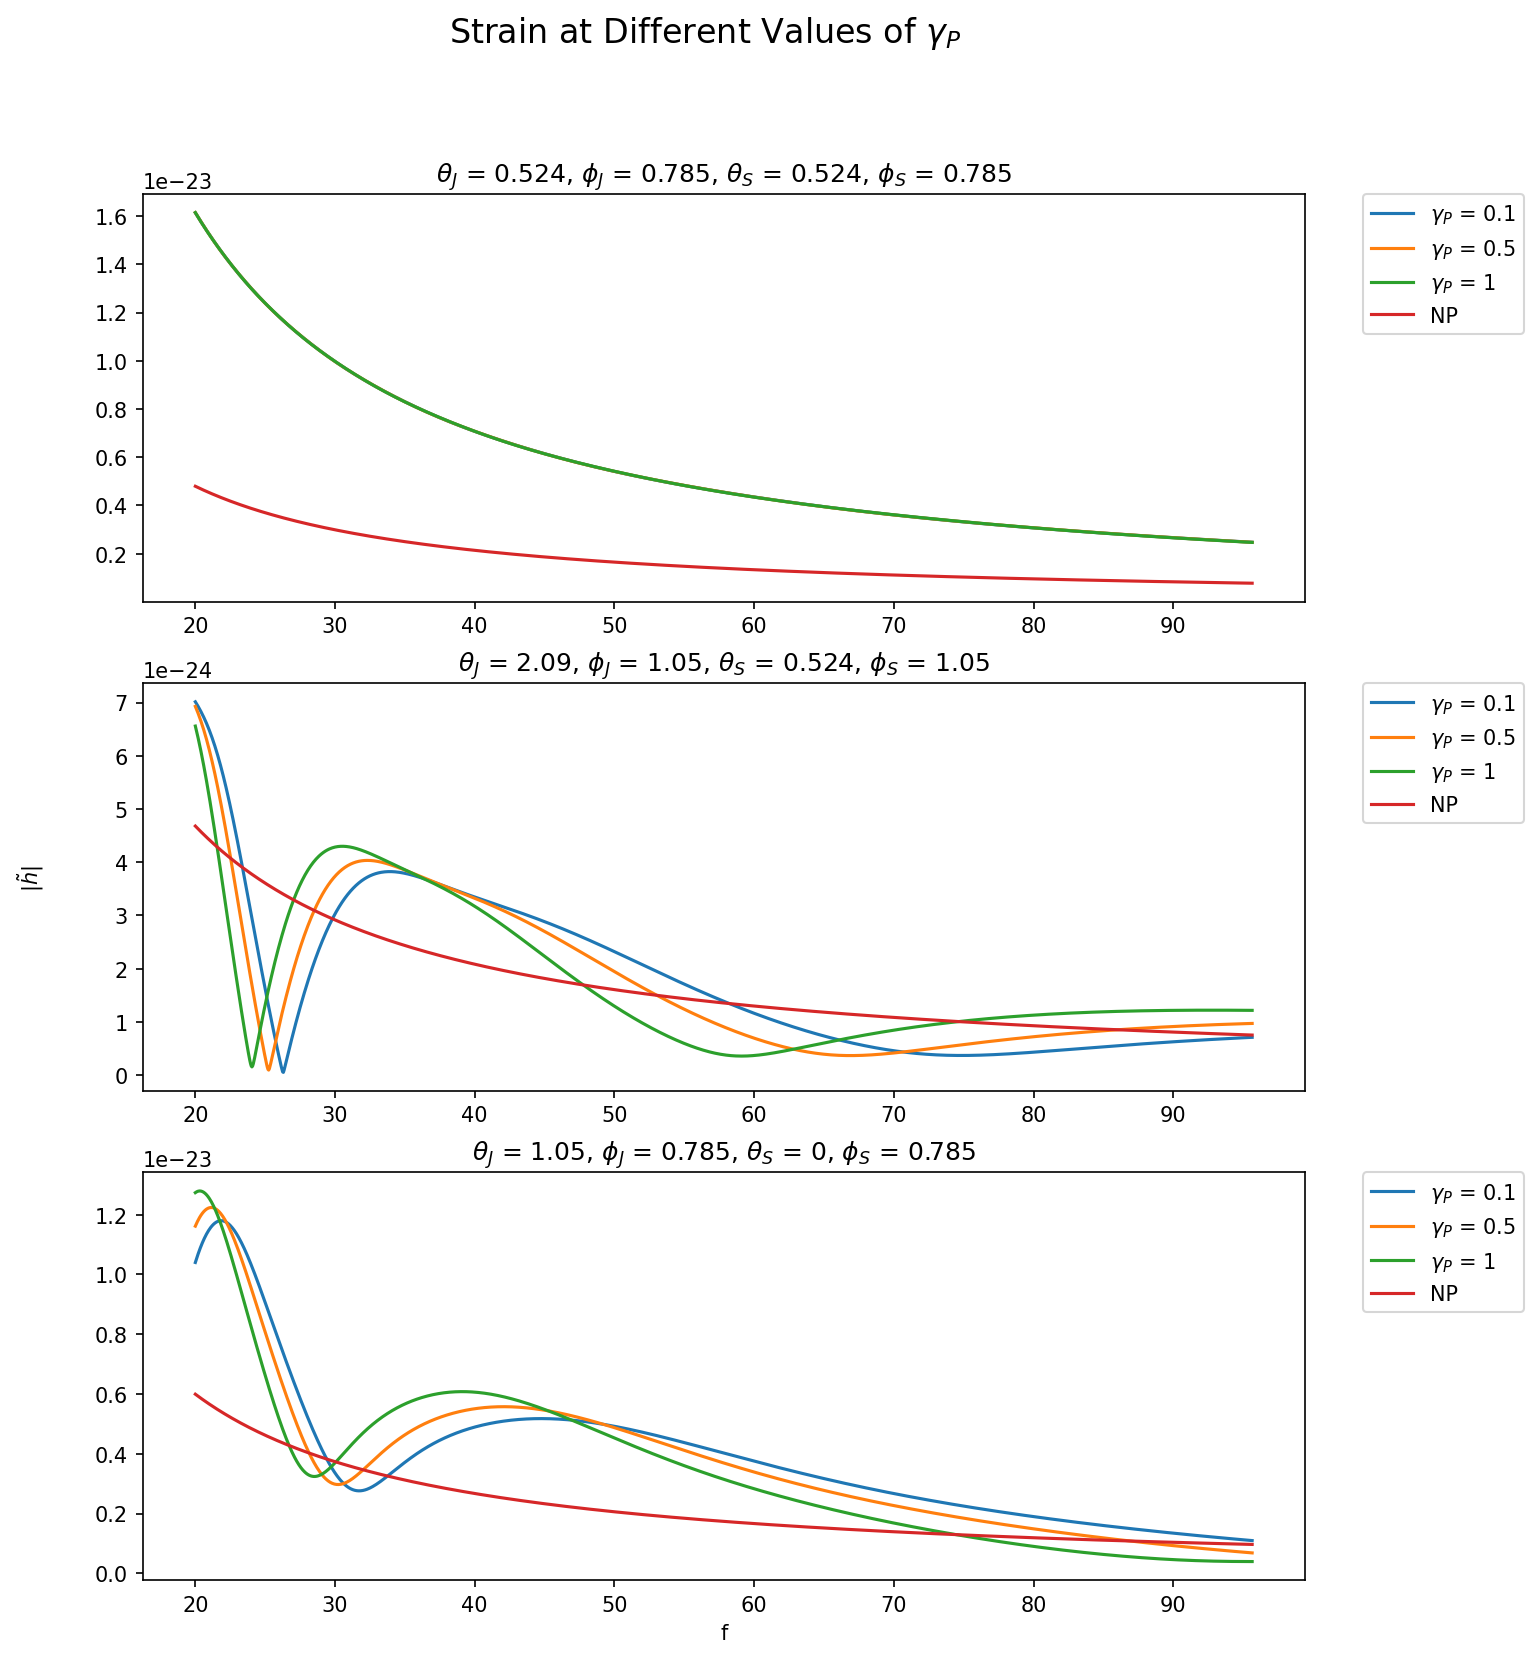

In [21]:
RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)

sky_locs_J, sky_locs_S = set_to_params(sky_locs_J_S, sky_locs_S_S)

# change values of gamma_P in RP_params
gamma_P_range = np.array([0.1, 0.5, 1])

precession_plot_panel_h(
    "gamma_P",
    1,
    gamma_P_range,
    r"$\gamma_P$",
    r"Strain at Different Values of $\gamma_P$",
)

## plot phase diff

In [22]:
sky_locs_J, sky_locs_S = set_to_params(sky_locs_J_E, sky_locs_S_E)


def precession_plot_panel_phase_diff(
    param_name, param_unit, param_range, param_label, title
):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
    # fig.subplots_adjust(hspace=0.5)
    # fig.subplots_adjust(wspace=0.5)

    for r, ((theta_J, phi_J), (theta_S, phi_S)) in enumerate(
        zip(sky_locs_J, sky_locs_S)
    ):
        RP_params["theta_J"] = NP_params["theta_J"] = theta_J
        RP_params["phi_J"] = NP_params["phi_J"] = phi_J
        RP_params["theta_S"] = NP_params["theta_S"] = theta_S
        RP_params["phi_S"] = NP_params["phi_S"] = phi_S

        ##
        for param in param_range:
            RP_params[param_name] = param * param_unit
            RP_inst = Precessing(RP_params)
            f_cut = RP_inst.f_cut()
            f_min = 20
            delta_f = 0.05
            f_range = np.arange(f_min, f_cut, delta_f)
            RP_strain = RP_inst.strain(f_range)
            phase_RP = np.unwrap(np.angle(RP_strain))

            if param_name == "mcz":
                NP_params[param_name] = param * param_unit
            NP_inst = Precessing(NP_params)
            f_cut_NP = NP_inst.f_cut()
            f_min_NP = 20
            delta_f = 0.05
            f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
            NP_strain = NP_inst.strain(f_range_NP)
            phase_NP = np.unwrap(np.angle(NP_strain))

            phase_diff = phase_RP - phase_NP
            phase_diff = np.unwrap(phase_diff - phase_diff[0])

            axes[r].plot(
                f_range, phase_diff, label="{} = {:.3g}".format(param_label, param)
            )
        ##

        axes[r].legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
        axes[r].set_title(
            r"$\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}".format(
                theta_J, phi_J, theta_S, phi_S
            )
        )

    fig.suptitle(title, fontsize=16)
    # set x and y labels for the entire panel
    fig.text(0.04, 0.5, r"$\Delta \Phi$", va="center", rotation="vertical")
    axes[-1].set_xlabel("f")

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:388: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


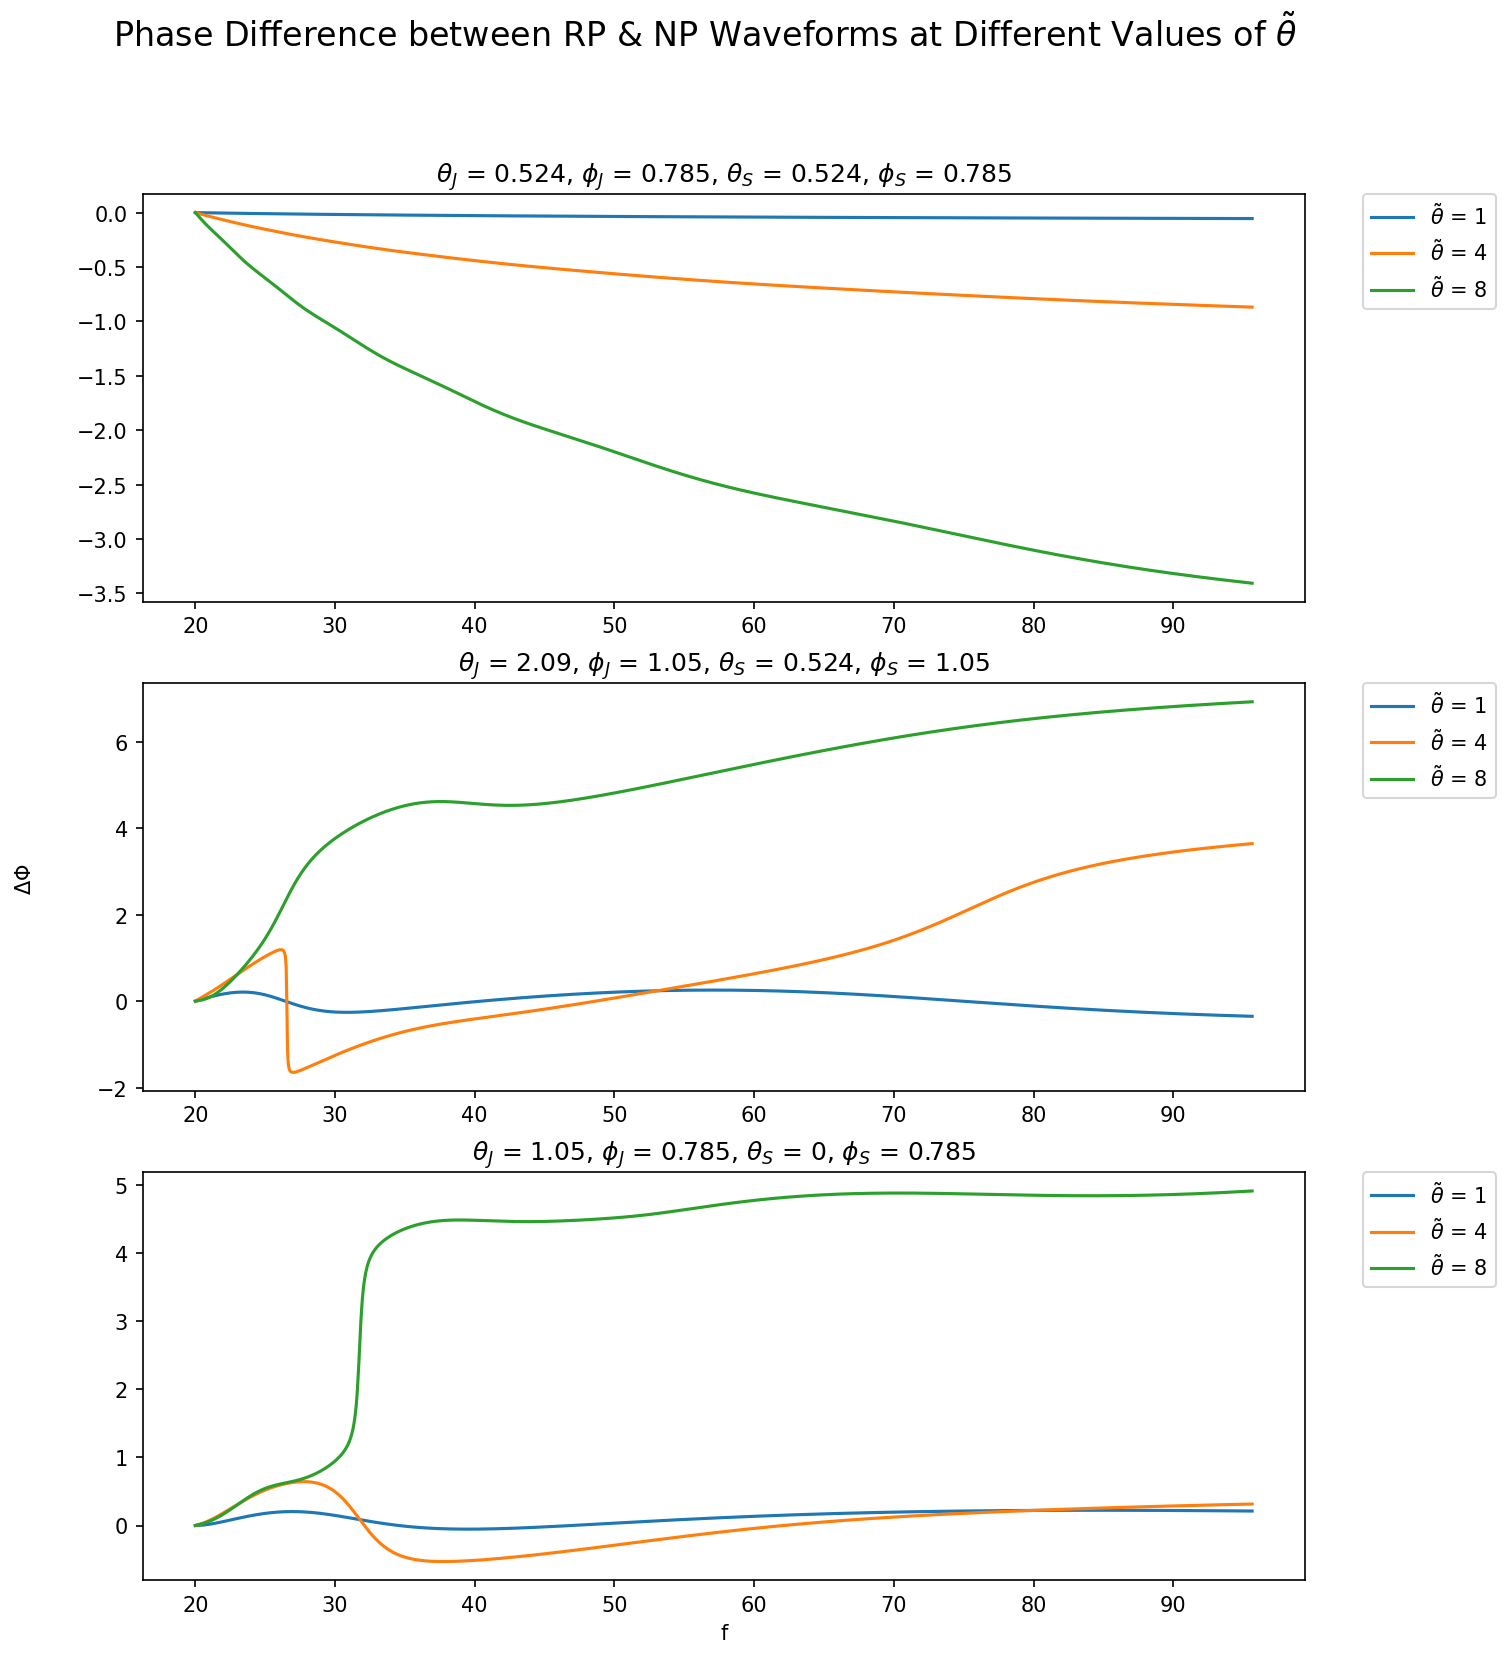

In [23]:
RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

sky_locs_J, sky_locs_S = set_to_params(sky_locs_J_S, sky_locs_S_S)

# change values of theta_tilde in RP_params
theta_tilde_range = np.array([1, 4, 8])

precession_plot_panel_phase_diff(
    "theta_tilde",
    1,
    theta_tilde_range,
    r"$\tilde{\theta}$",
    r"Phase Difference between RP & NP Waveforms at Different Values of $\tilde{\theta}$",
)

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:388: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


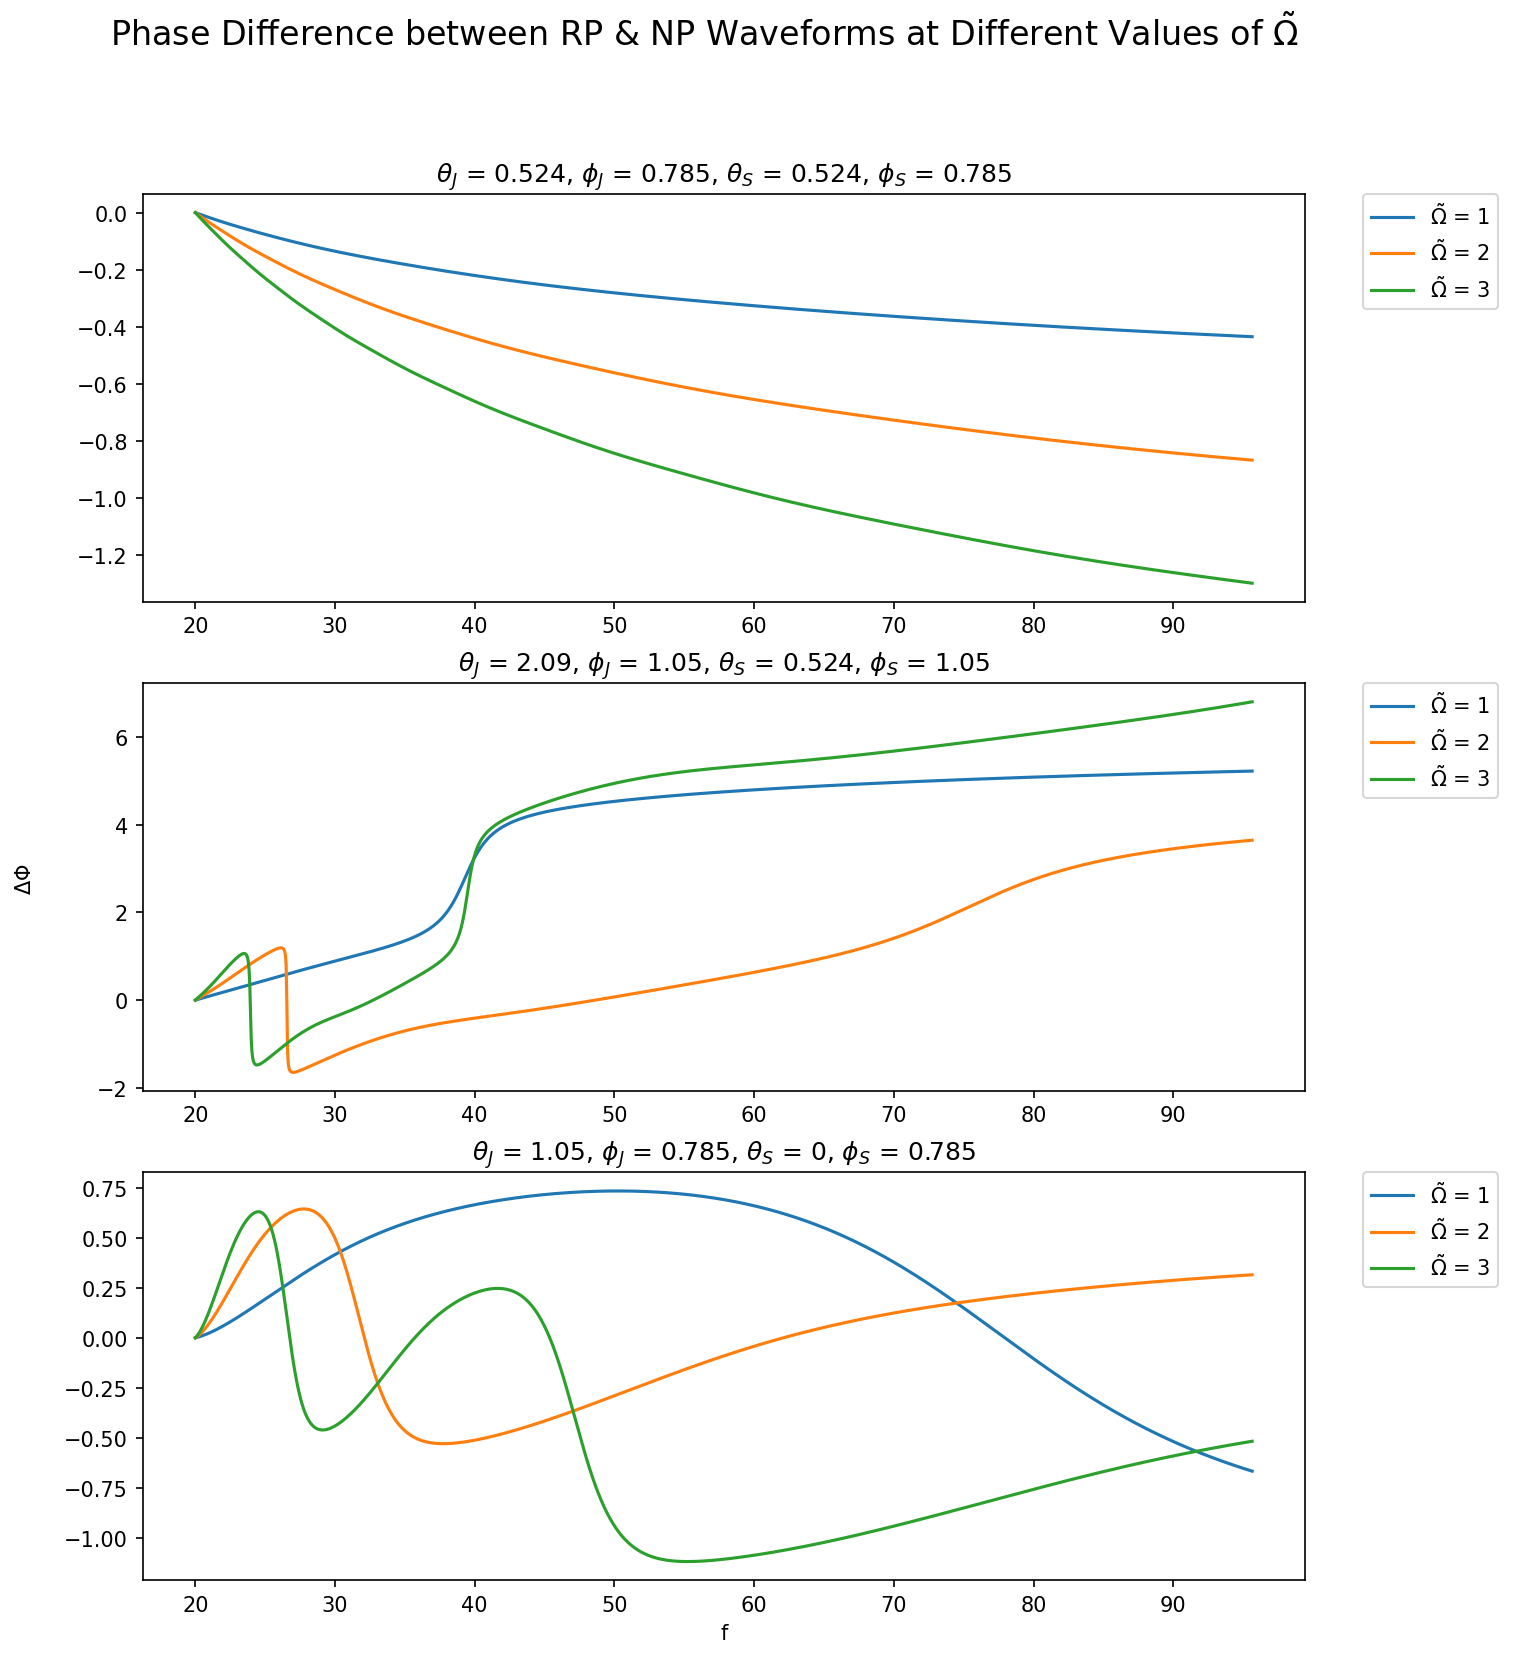

In [24]:
RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)

sky_locs_J, sky_locs_S = set_to_params(sky_locs_J_S, sky_locs_S_S)

# change values of omega_tilde in RP_params
omega_tilde_range = np.array([1, 2, 3])

precession_plot_panel_phase_diff(
    "omega_tilde",
    1,
    omega_tilde_range,
    r"$\tilde{\Omega}$",
    r"Phase Difference between RP & NP Waveforms at Different Values of $\tilde{\Omega}$",
)

In [25]:
RP_params, NP_params = set_to_params(RP_params_1, NP_params_1)

# using sky_locs_J_E and sky_locs_S_E (Evangelos's choice)
sky_locs_J, sky_locs_S = set_to_params(sky_locs_J_S, sky_locs_S_S)

# change values of gamma_P in RP_params
gamma_P_range = np.array([0.1, 0.5, 1])

precession_plot_panel_phase_diff(
    "gamma_P",
    1,
    gamma_P_range,
    r"$\gamma_P$",
    r"Phase Difference between RP & NP Waveforms at Different Values of $\gamma_P$",
)

/Users/fairytien/Google Drive (fairynguyen33@gmail.com)/TEXAS Bridge Program 2023-2024/code/Tien's/scripts/Classes_ver1.py:388: RuntimeWarning: divide by zero encountered in divide
  tan_psi = num_psi / den_psi


## side by side plots

In [54]:
RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()


def precession_strain_phase_plot(param_name, param_range, param_label):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    for param in param_range:
        RP_params[param_name] = param
        RP_inst = Precessing(RP_params)
        f_cut = RP_inst.f_cut()
        f_min = 20
        delta_f = 0.05
        f_range = np.arange(f_min, f_cut, delta_f)
        RP_strain = RP_inst.strain(f_range)
        phase_RP = np.unwrap(np.angle(RP_strain))

        NP_params[param_name] = param
        NP_inst = Precessing(NP_params)
        f_cut_NP = NP_inst.f_cut()
        f_min_NP = 20
        delta_f = 0.05
        f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
        NP_strain = NP_inst.strain(f_range_NP)
        phase_NP = np.unwrap(np.angle(NP_strain))

        phase_diff = phase_RP - phase_NP
        phase_diff = np.unwrap(phase_diff - phase_diff[0])

        axes[0].loglog(
            f_range,
            np.abs(RP_strain),
            label="{} = {}".format(param_label, param),
        )
        axes[1].plot(f_range, phase_diff, label="{} = {}".format(param_label, param))

    axes[0].loglog(f_range_NP, np.abs(NP_strain), label="NP")
    axes[0].legend(
        bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=14
    )
    axes[0].set_xlabel("f", fontsize=14)
    axes[0].set_ylabel(r"$|\~{h}|$", fontsize=14)
    axes[0].set_title("Regularly Precessing Strain", fontsize=16)

    axes[1].set_xscale("log")
    axes[1].set_xlabel("f", fontsize=14)
    axes[1].set_ylabel(r"$\Delta \Phi$", fontsize=14)
    axes[1].set_title("Phase Difference", fontsize=16)

Text(0.5, 0.5, '$\\Delta \\Phi$')

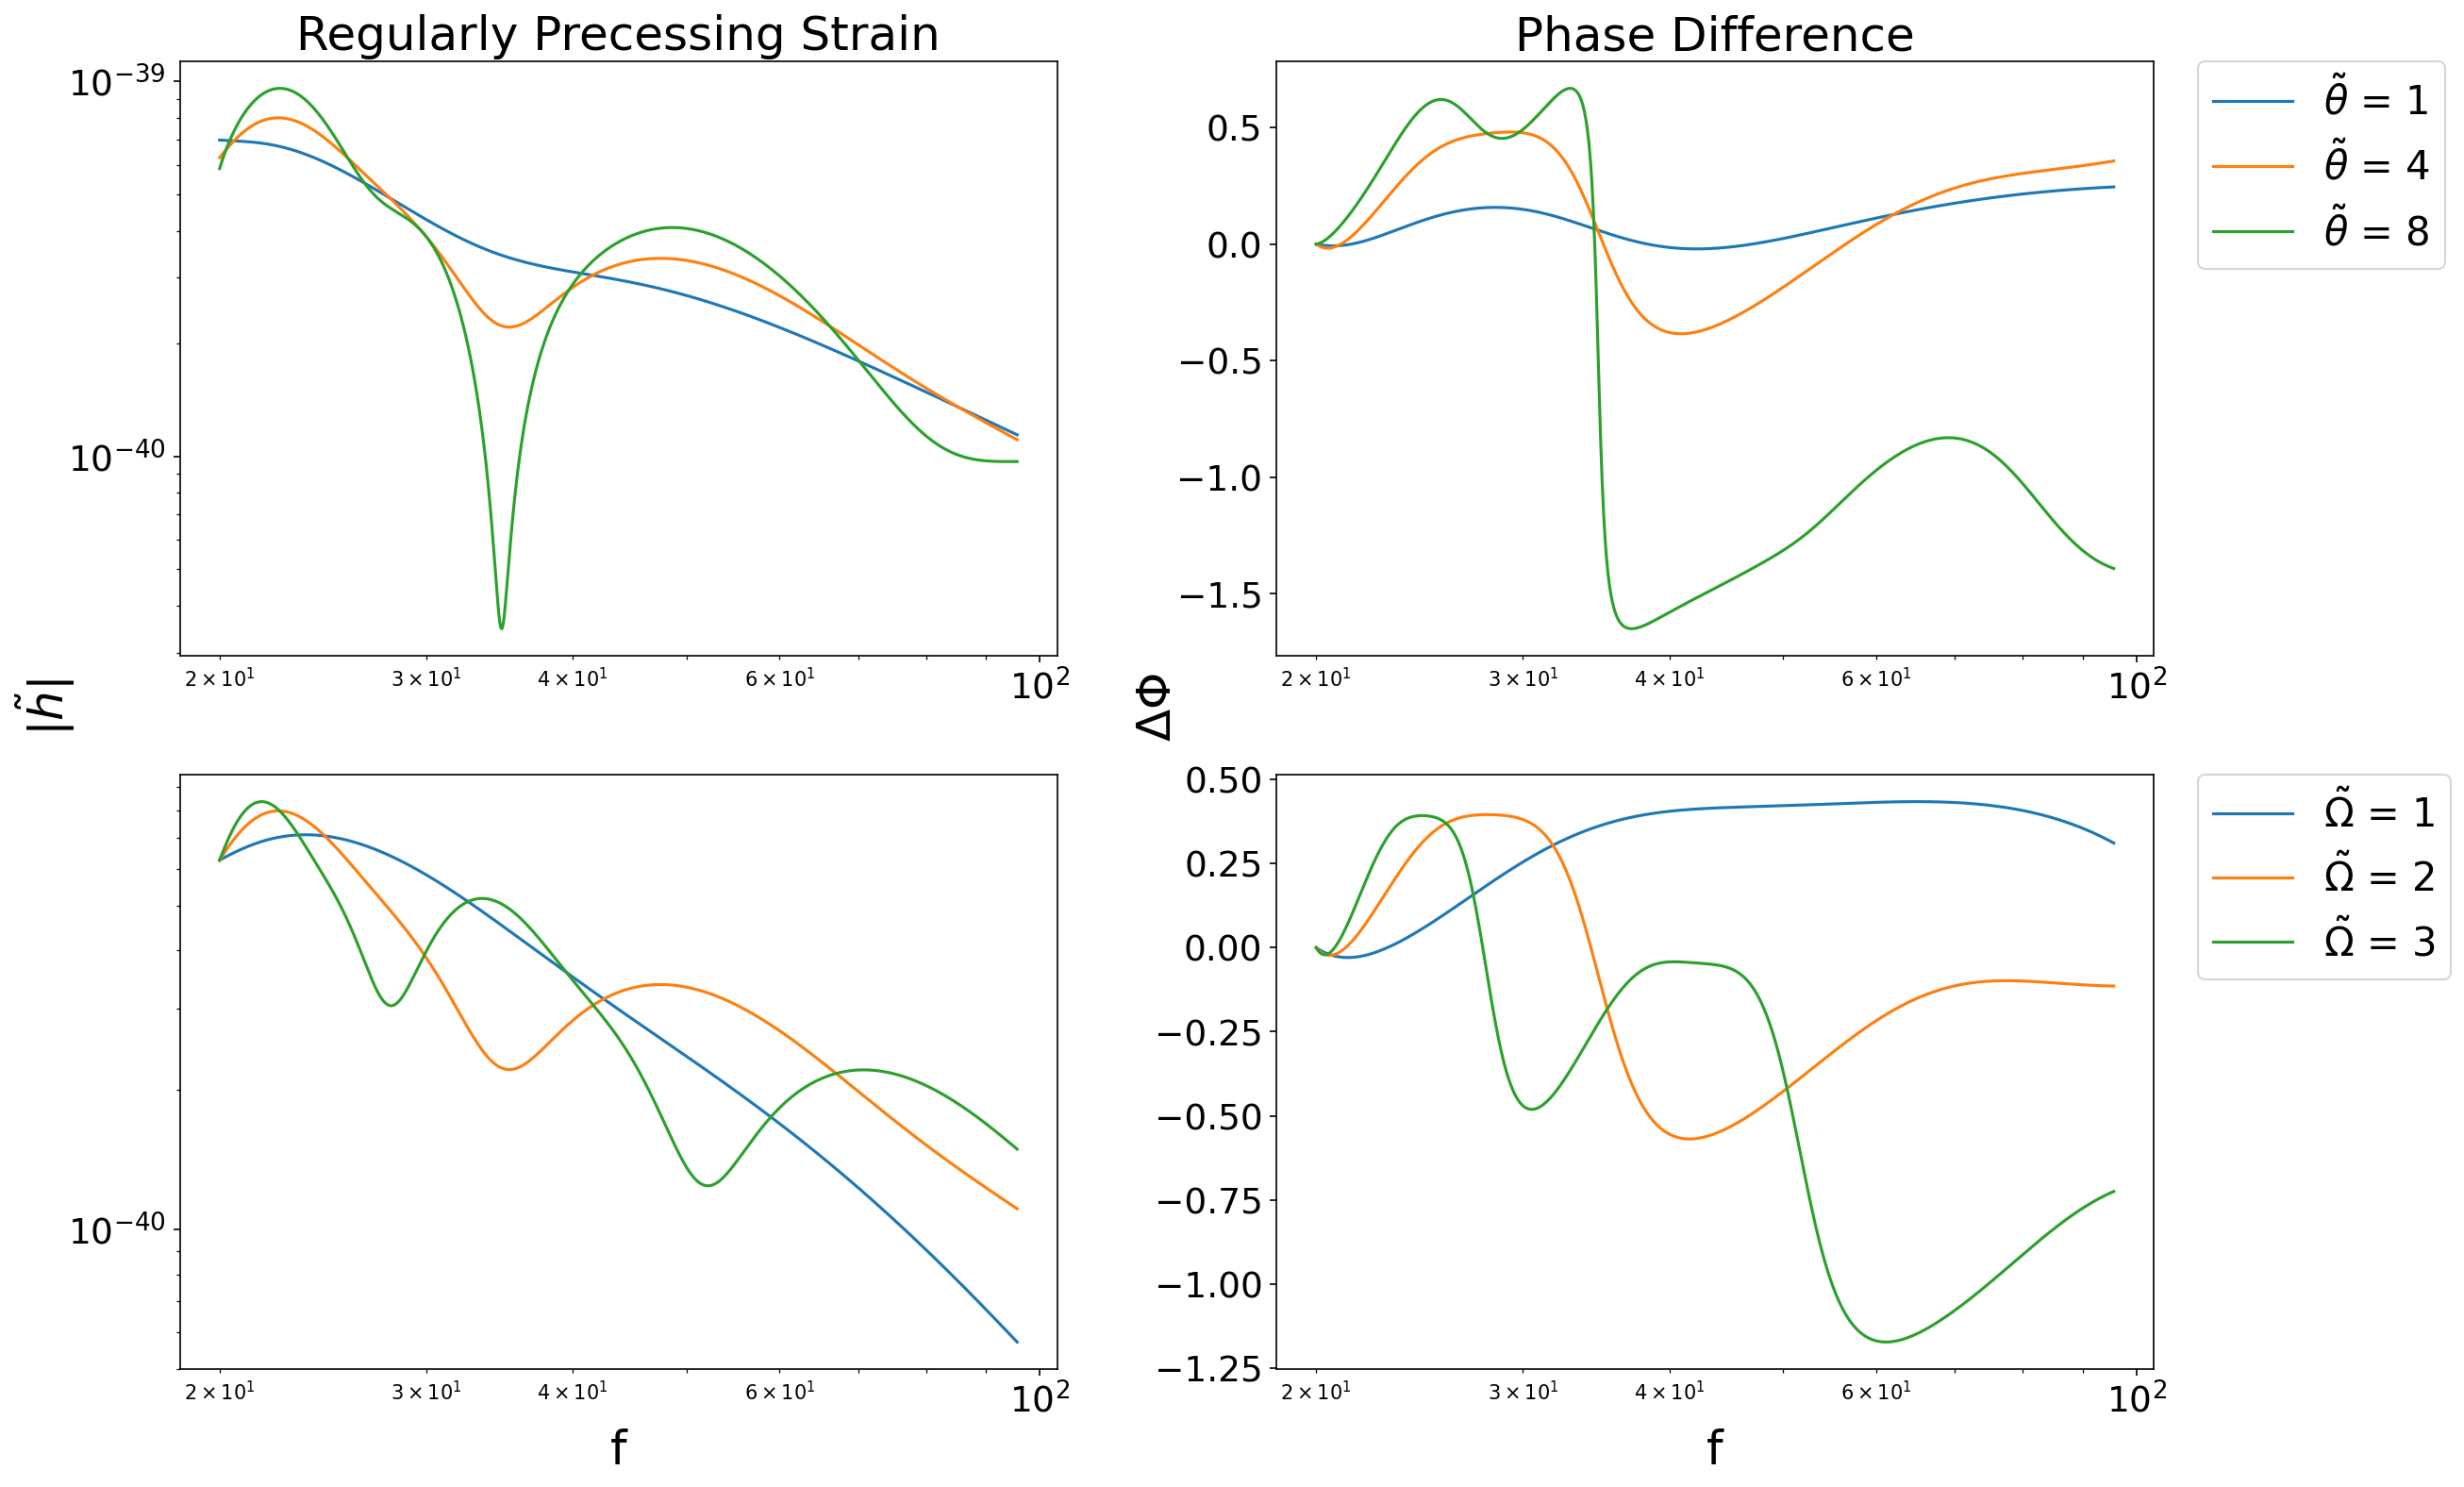

In [55]:
RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

theta_tilde_range = np.array([1, 4, 8])
for theta_tilde in theta_tilde_range:
    RP_params["theta_tilde"] = theta_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["theta_tilde"] = theta_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].loglog(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
    )
    axes[0, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde)
    )

# axes[0, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP")
axes[0, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
# axes[0, 0].set_xlabel("f", fontsize=24)
# axes[0, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Regularly Precessing Strain", fontsize=24)

axes[0, 1].set_xscale("log")
# axes[0, 1].set_xlabel("f", fontsize=24)
# axes[0, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

omega_tilde_range = np.array([1, 2, 3])
for omega_tilde in omega_tilde_range:
    RP_params["omega_tilde"] = omega_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["omega_tilde"] = omega_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].loglog(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
    )
    axes[1, 1].plot(
        f_range, phase_diff, label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde)
    )

# axes[1, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP")
axes[1, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[1, 0].set_xlabel("f", fontsize=24)
# axes[1, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 0].set_title("Regularly Precessing Strain", fontsize=24)

axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f", fontsize=24)
# axes[1, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 1].set_title("Phase Difference", fontsize=24)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(0.50, 0.5, r"$\Delta \Phi$", va="center", rotation="vertical", fontsize=24)

Text(0.49, 0.5, '$\\Phi_{RP} - \\Phi_{NP}$ (rad)')

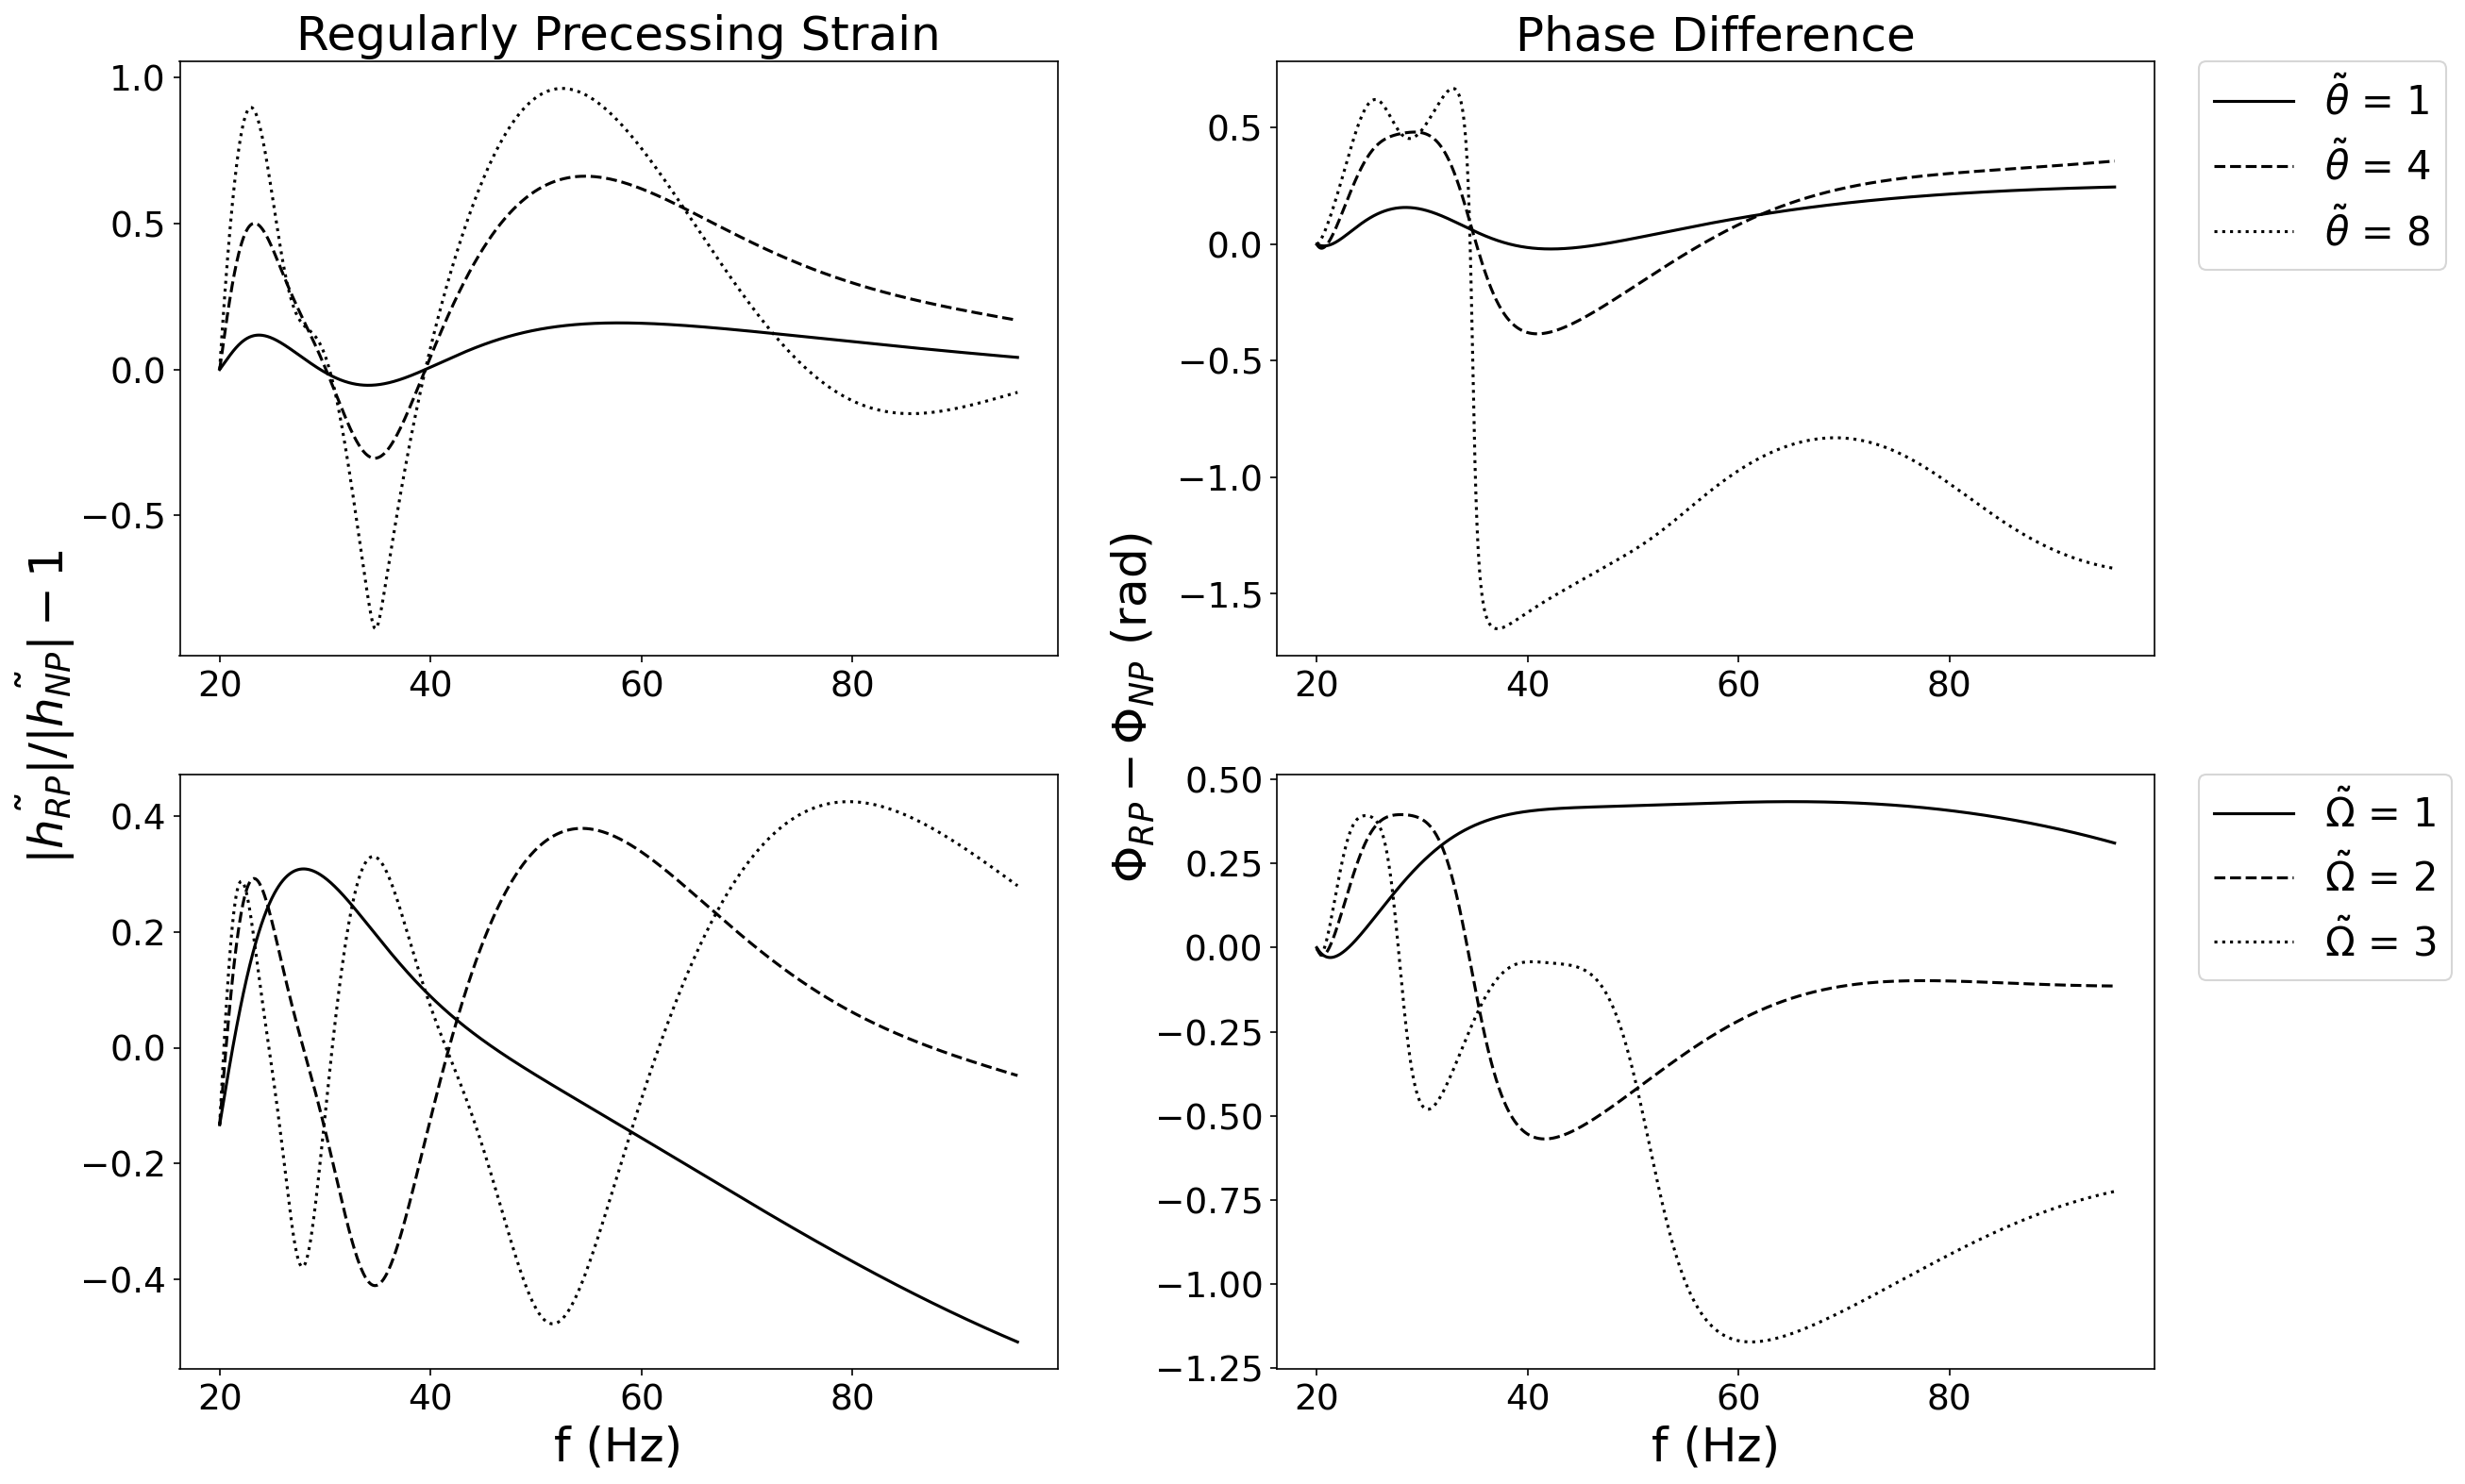

In [56]:
RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

theta_tilde_range = np.array([1, 4, 8])
line_styles = ["-", "--", ":"]  # Solid, dashed, dotted

for i, theta_tilde in enumerate(theta_tilde_range):
    RP_params["theta_tilde"] = theta_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["theta_tilde"] = theta_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(
        f_range,
        np.abs(RP_strain) / np.abs(NP_strain) - 1,
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color="black",
        linestyle=line_styles[i % len(line_styles)],
    )
    axes[0, 1].plot(
        f_range,
        phase_diff,
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color="black",
        linestyle=line_styles[i % len(line_styles)],
    )

# axes[0, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP", color='black', linestyle='-')
axes[0, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
# axes[0, 0].set_xlabel("f", fontsize=24)
# axes[0, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[0, 1].set_xscale("log")
# axes[0, 1].set_xlabel("f", fontsize=24)
# axes[0, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

omega_tilde_range = np.array([1, 2, 3])
line_styles = ["-", "--", ":"]  # Solid, dashed, dotted

for i, omega_tilde in enumerate(omega_tilde_range):
    RP_params["omega_tilde"] = omega_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["omega_tilde"] = omega_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(
        f_range,
        np.abs(RP_strain) / np.abs(NP_strain) - 1,
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color="black",
        linestyle=line_styles[i % len(line_styles)],
    )
    axes[1, 1].plot(
        f_range,
        phase_diff,
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color="black",
        linestyle=line_styles[i % len(line_styles)],
    )

# axes[1, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP", color='black', linestyle='-')
axes[1, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 1].set_title("Phase Difference", fontsize=24)

# set one y label for both columns
fig.text(
    0.06,
    0.5,
    r"$|\~{h_{RP}}| / |\~{h_{NP}}| - 1$",
    va="center",
    rotation="vertical",
    fontsize=24,
)
fig.text(
    0.49,
    0.5,
    r"$\Phi_{RP} - \Phi_{NP}$ (rad)",
    va="center",
    rotation="vertical",
    fontsize=24,
)

In [61]:
RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.subplots_adjust(wspace=0.25)

theta_tilde_range = np.array([1, 4, 8])
line_styles = ["-", "--", ":"]  # Solid, dashed, dotted

for i, theta_tilde in enumerate(theta_tilde_range):
    RP_params["theta_tilde"] = theta_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["theta_tilde"] = theta_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[0, 0].plot(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color="black",
        linestyle=line_styles[i % len(line_styles)],
    )
    axes[0, 1].plot(
        f_range,
        phase_diff,
        label="{} = {}".format(r"$\tilde{\theta}$", theta_tilde),
        color="black",
        linestyle=line_styles[i % len(line_styles)],
    )

# axes[0, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP", color='black', linestyle='-')
axes[0, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
# axes[0, 0].set_xlabel("f", fontsize=24)
# axes[0, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[0, 0].tick_params(axis="both", which="major", labelsize=18)
axes[0, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[0, 1].set_xscale("log")
# axes[0, 1].set_xlabel("f", fontsize=24)
# axes[0, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[0, 1].tick_params(axis="both", which="major", labelsize=18)
axes[0, 1].set_title("Phase Difference", fontsize=24)

RP_params = RP_params_1.copy()
NP_params = NP_params_1.copy()

omega_tilde_range = np.array([1, 2, 3])
line_styles = ["-", "--", ":"]  # Solid, dashed, dotted

for i, omega_tilde in enumerate(omega_tilde_range):
    RP_params["omega_tilde"] = omega_tilde
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    NP_params["omega_tilde"] = omega_tilde
    NP_inst = Precessing(NP_params)
    f_cut_NP = NP_inst.f_cut()
    f_min_NP = 20
    delta_f = 0.05
    f_range_NP = np.arange(f_min_NP, f_cut_NP, delta_f)
    NP_strain = NP_inst.strain(f_range_NP)
    phase_NP = np.unwrap(np.angle(NP_strain))

    phase_diff = phase_RP - phase_NP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1, 0].plot(
        f_range,
        np.abs(RP_strain),
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color="black",
        linestyle=line_styles[i % len(line_styles)],
    )
    axes[1, 1].plot(
        f_range,
        phase_diff,
        label="{} = {}".format(r"$\tilde{\Omega}$", omega_tilde),
        color="black",
        linestyle=line_styles[i % len(line_styles)],
    )

# axes[1, 0].loglog(f_range_NP, np.abs(NP_strain), label="NP", color='black', linestyle='-')
axes[1, 0].legend(
    bbox_to_anchor=(2.3, 1), loc="upper left", borderaxespad=0.0, fontsize=20
)
axes[1, 0].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 0].set_ylabel(r"$|\~{h}|$", fontsize=24)
axes[1, 0].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 0].set_title("Regularly Precessing Strain", fontsize=24)

# axes[1, 1].set_xscale("log")
axes[1, 1].set_xlabel("f (Hz)", fontsize=24)
# axes[1, 1].set_ylabel(r"$\Delta \Phi$", fontsize=24)
axes[1, 1].tick_params(axis="both", which="major", labelsize=18)
# axes[1, 1].set_title("Phase Difference", fontsize=24)

# set one y label for both columns
fig.text(0.06, 0.5, r"$|\~{h}|$", va="center", rotation="vertical", fontsize=24)
fig.text(
    0.49,
    0.5,
    r"$\Phi_{RP} - \Phi_{NP}$ (rad)",
    va="center",
    rotation="vertical",
    fontsize=24,
)

Text(0.49, 0.5, '$\\Phi_{RP} - \\Phi_{NP}$ (rad)')

# waveform comparison

In [16]:
def waveform_comparison():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    fig.subplots_adjust(wspace=0.25)

    # RP waveform
    RP_inst = Precessing(RP_params)
    f_cut = RP_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    RP_strain = RP_inst.strain(f_range)
    phase_RP = np.unwrap(np.angle(RP_strain))

    axes[0].plot(f_range, np.abs(RP_strain), label="RP", color="black", linestyle="-")

    # lensed waveform
    lens_inst = LensingGeo(lens_params)
    f_cut = lens_inst.f_cut()
    f_min = 20
    delta_f = 0.05
    f_range = np.arange(f_min, f_cut, delta_f)
    lensed_strain = lens_inst.strain(f_range)
    phase_L = np.unwrap(np.angle(lensed_strain))

    axes[0].plot(
        f_range, np.abs(lensed_strain), label="Lensed", color="black", linestyle="--"
    )

    axes[0].legend(fontsize=20)
    axes[0].set_xlabel("f (Hz)", fontsize=24)
    axes[0].set_ylabel(r"$|\~{h}|$", fontsize=24)
    axes[0].tick_params(axis="both", which="major", labelsize=18)
    axes[0].set_title("Strain", fontsize=24)

    phase_diff = phase_L - phase_RP
    phase_diff = np.unwrap(phase_diff - phase_diff[0])

    axes[1].plot(f_range, phase_diff, label="RP", color="black", linestyle="-")
    # axes[1].plot(f_range, phase_L, label="Lensed", color='black', linestyle='--') # testing
    # axes[1].plot(f_range, phase_RP, label="RP", color='black', linestyle=':') # testing

    # axes[1].set_xscale("log")
    axes[1].set_xlabel("f (Hz)", fontsize=24)
    axes[1].set_ylabel(r"$\Phi_L - \Phi_P$ (rad)", fontsize=24)
    axes[1].tick_params(axis="both", which="major", labelsize=18)
    axes[1].set_title("Phase Difference", fontsize=24)

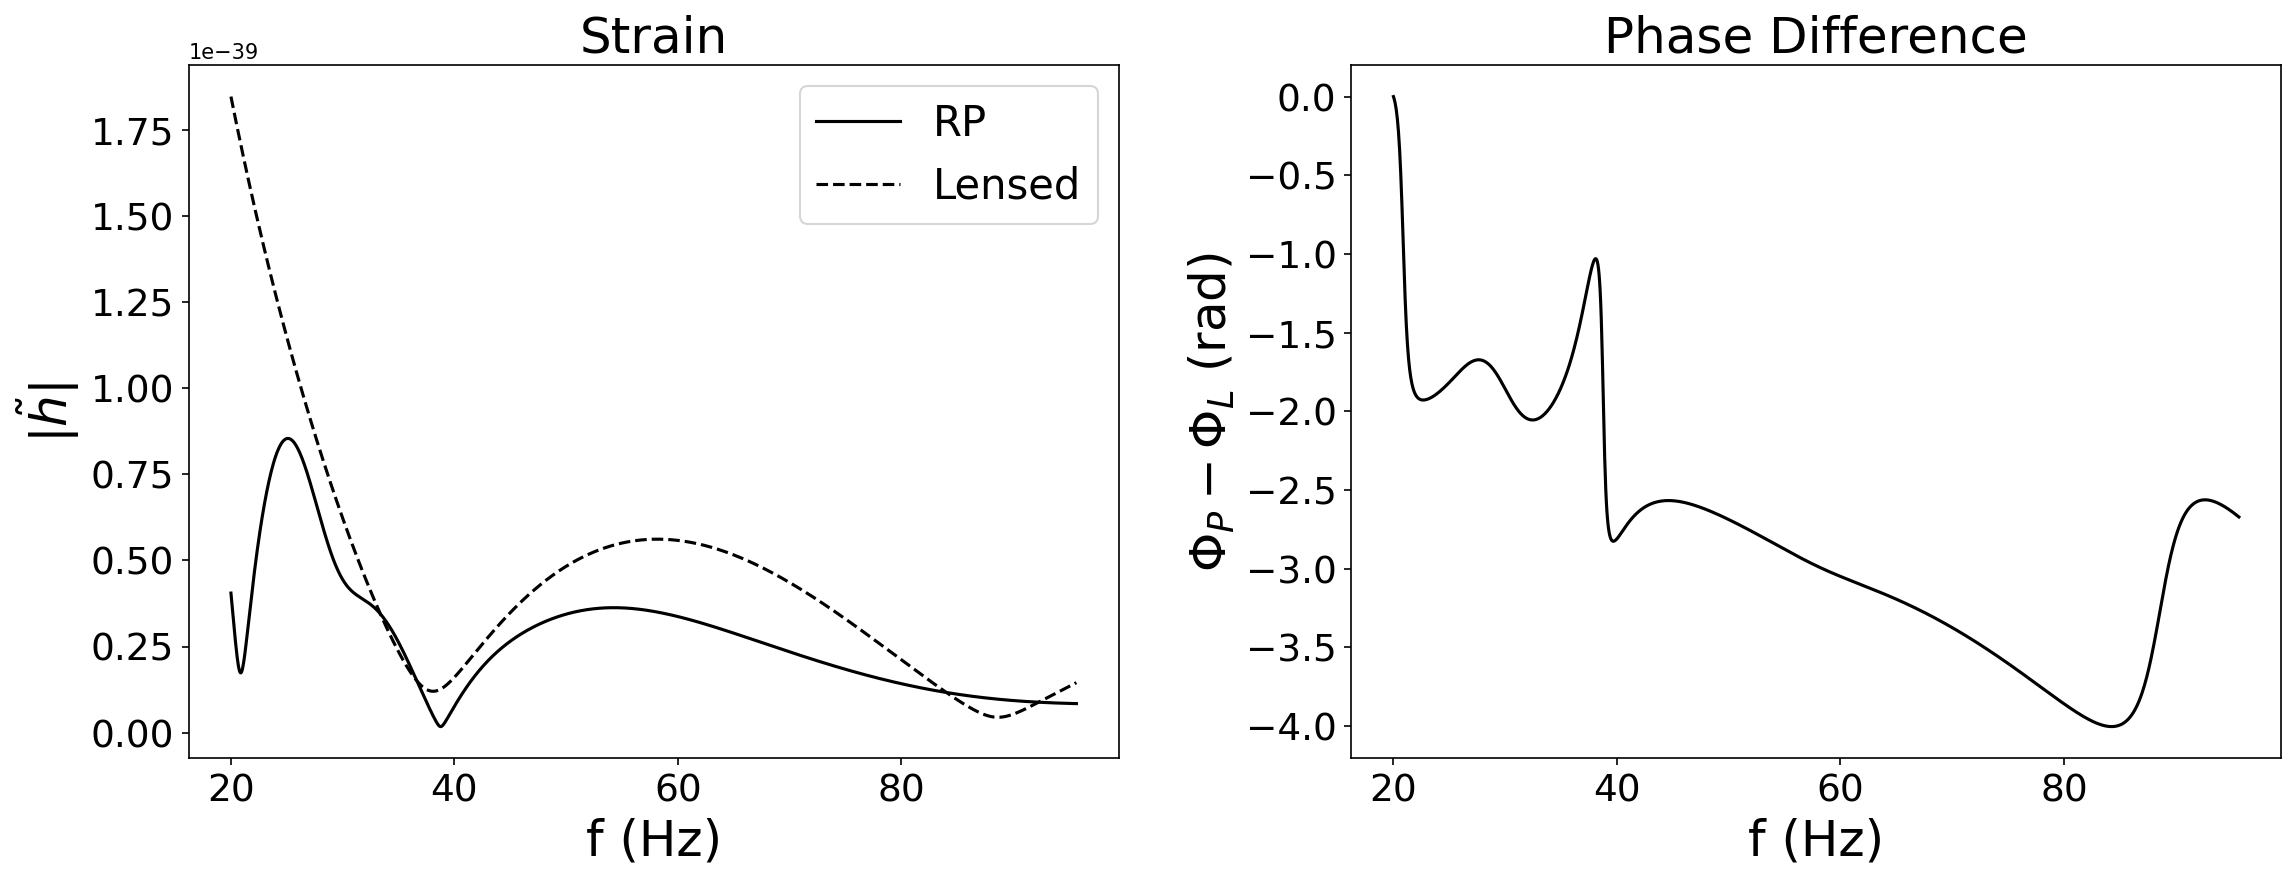

In [17]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8
RP_params["gamma_P"] = 4.82

waveform_comparison()

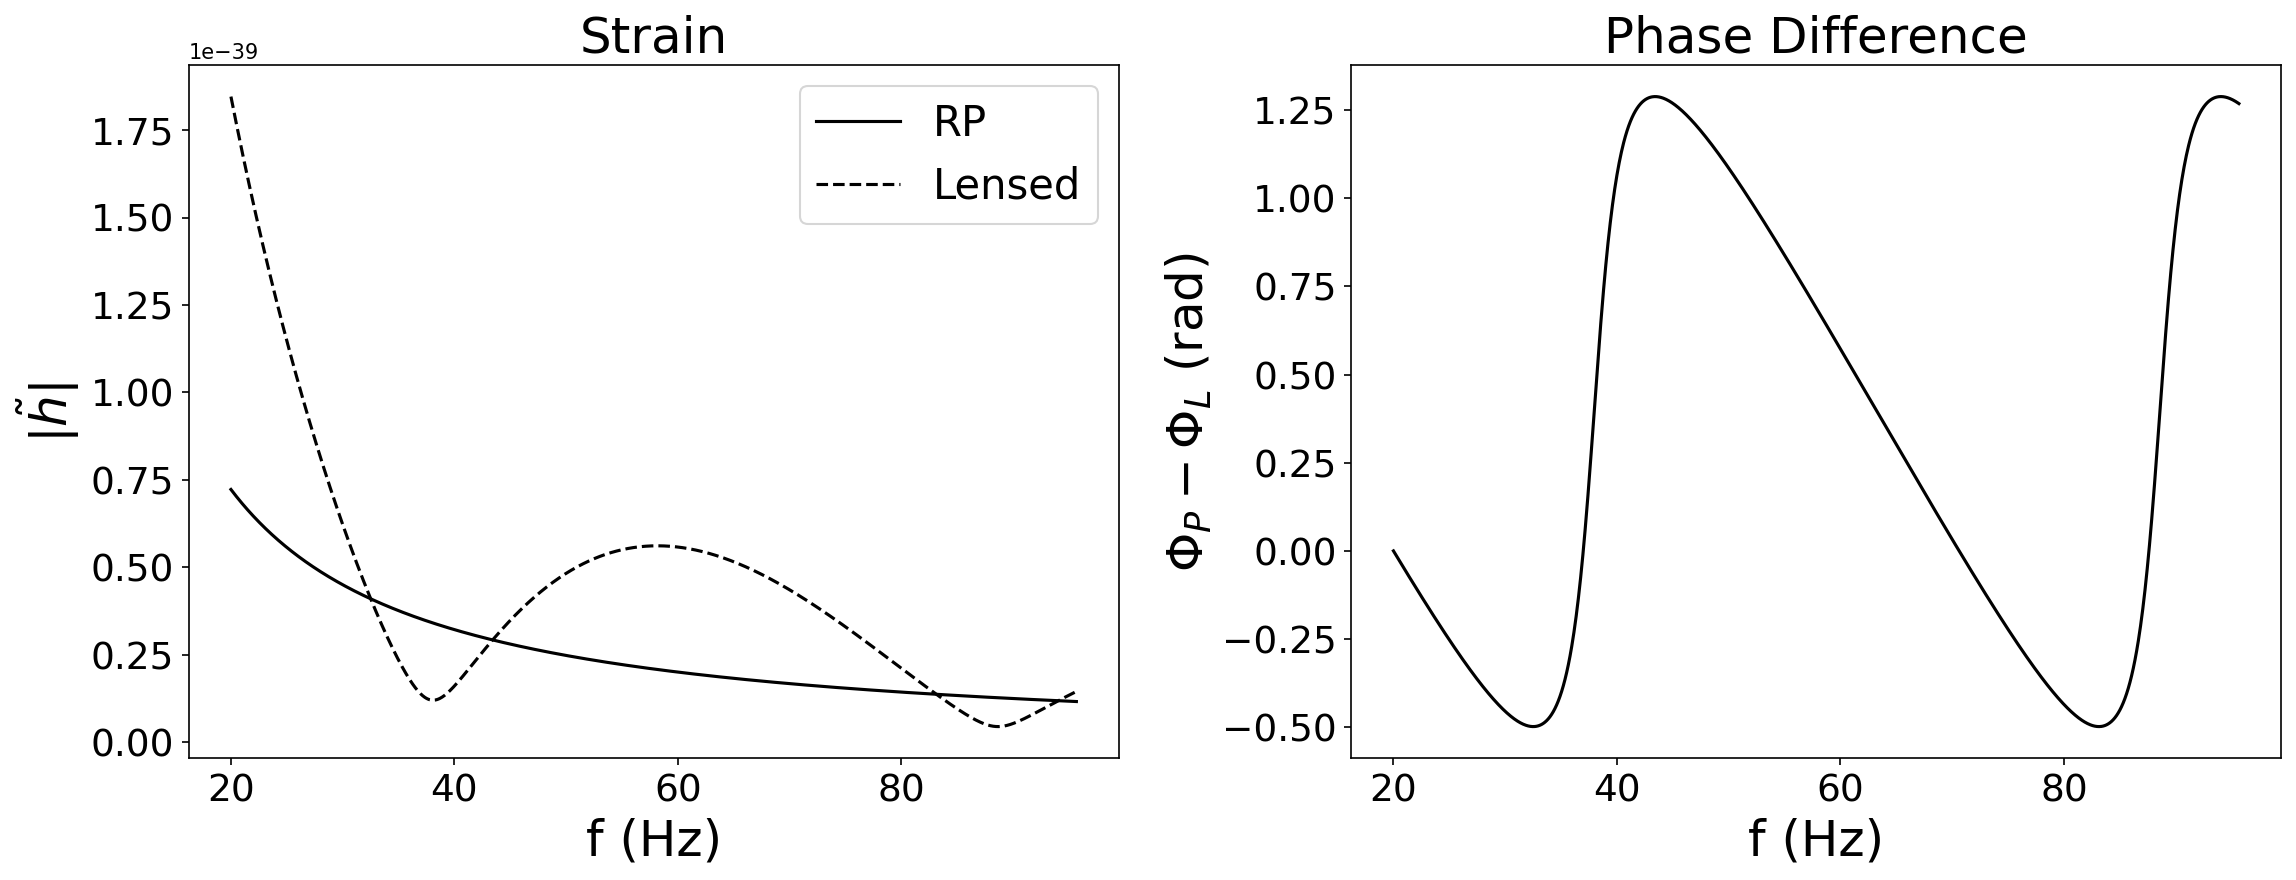

In [18]:
lens_params, RP_params, NP_params = set_to_params(
    lens_params_1, RP_params_1, NP_params_1
)

RP_params["omega_tilde"] = 0
RP_params["theta_tilde"] = 0
RP_params["gamma_P"] = 0

waveform_comparison()